In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the data
df = pd.read_excel('train(1).xlsx')

# 2. Basic Inspection
print(f"Total Properties: {len(df)}")
print(df.info()) # Shows column types and missing values

Total Properties: 16209
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16209 entries, 0 to 16208
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             16209 non-null  int64  
 1   date           16209 non-null  object 
 2   price          16209 non-null  int64  
 3   bedrooms       16209 non-null  int64  
 4   bathrooms      16209 non-null  float64
 5   sqft_living    16209 non-null  int64  
 6   sqft_lot       16209 non-null  int64  
 7   floors         16209 non-null  float64
 8   waterfront     16209 non-null  int64  
 9   view           16209 non-null  int64  
 10  condition      16209 non-null  int64  
 11  grade          16209 non-null  int64  
 12  sqft_above     16209 non-null  int64  
 13  sqft_basement  16209 non-null  int64  
 14  yr_built       16209 non-null  int64  
 15  yr_renovated   16209 non-null  int64  
 16  zipcode        16209 non-null  int64  
 17  lat            16209 non-n

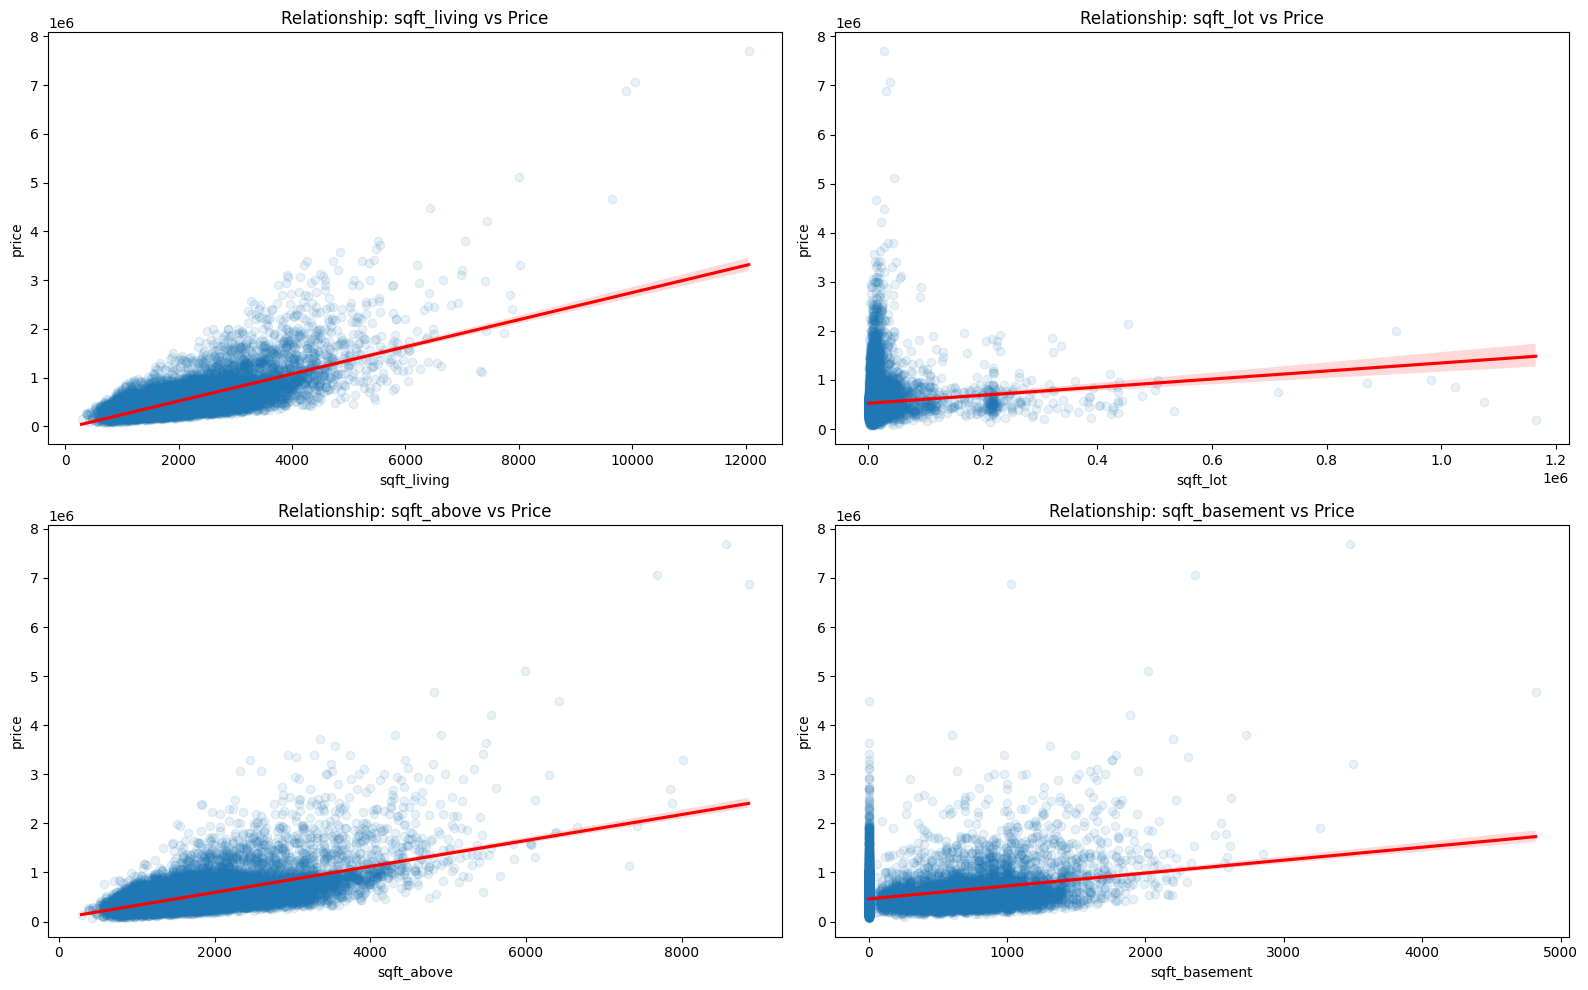

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a subplot for size features
features_size = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']
plt.figure(figsize=(16, 10))

for i, col in enumerate(features_size):
    plt.subplot(2, 2, i+1)
    sns.regplot(data=df, x=col, y='price', scatter_kws={'alpha':0.1}, line_kws={'color':'red'})
    plt.title(f'Relationship: {col} vs Price')

plt.tight_layout()
plt.show()

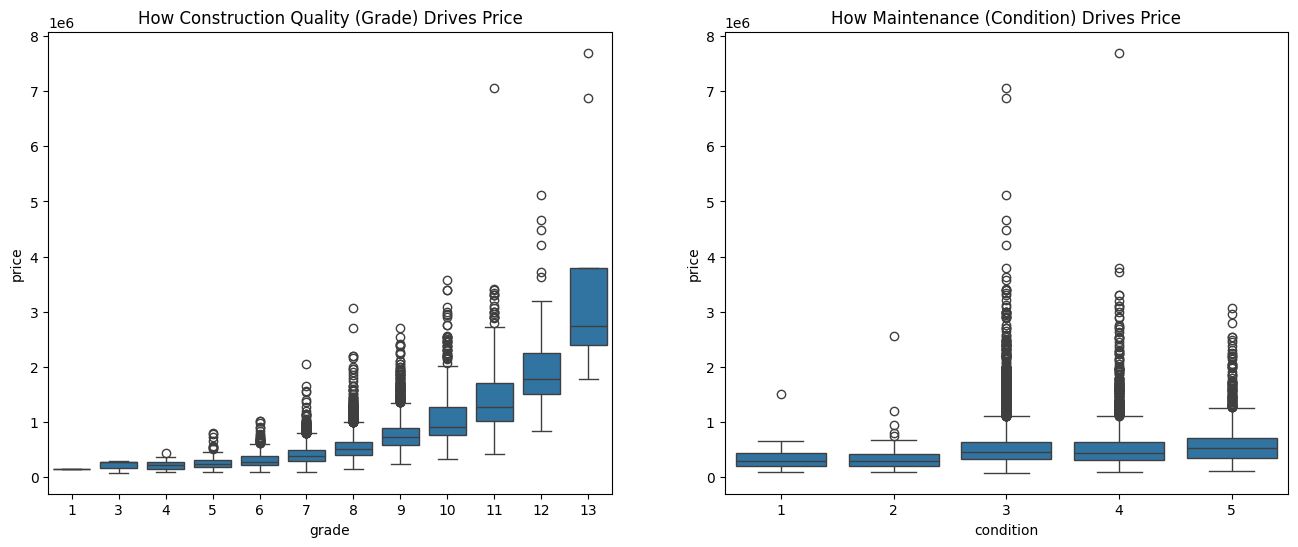

In [3]:
plt.figure(figsize=(16, 6))

# Grade vs Price
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='grade', y='price')
plt.title('How Construction Quality (Grade) Drives Price')

# Condition vs Price
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='condition', y='price')
plt.title('How Maintenance (Condition) Drives Price')

plt.show()

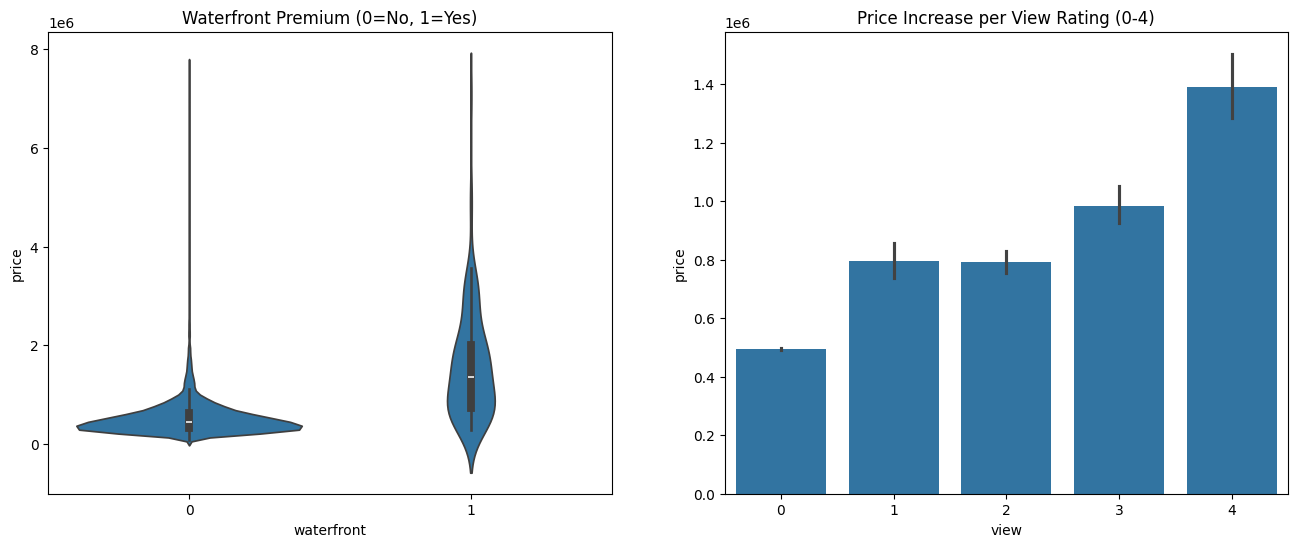

In [4]:
# Create a figure to see if "View" and "Waterfront" overlap
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.violinplot(data=df, x='waterfront', y='price')
plt.title('Waterfront Premium (0=No, 1=Yes)')

plt.subplot(1, 2, 2)
sns.barplot(data=df, x='view', y='price')
plt.title('Price Increase per View Rating (0-4)')

plt.show()

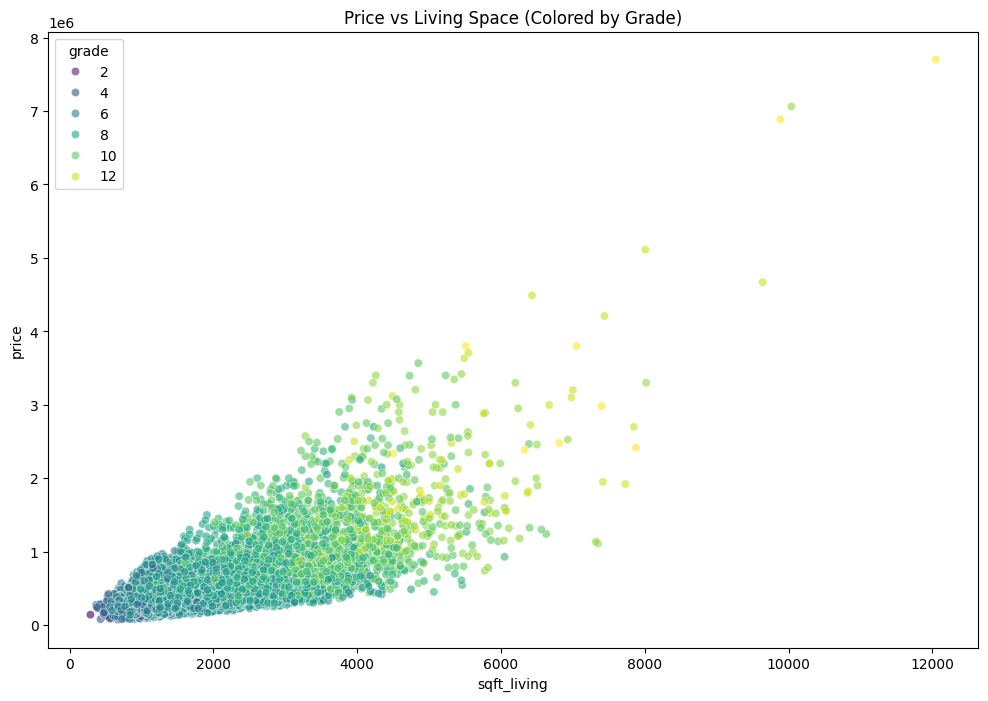

In [5]:
plt.figure(figsize=(12, 8))
# We use a scatter plot with Hue to see three dimensions at once
sns.scatterplot(data=df, x='sqft_living', y='price', hue='grade', palette='viridis', alpha=0.6)
plt.title('Price vs Living Space (Colored by Grade)')
plt.show()

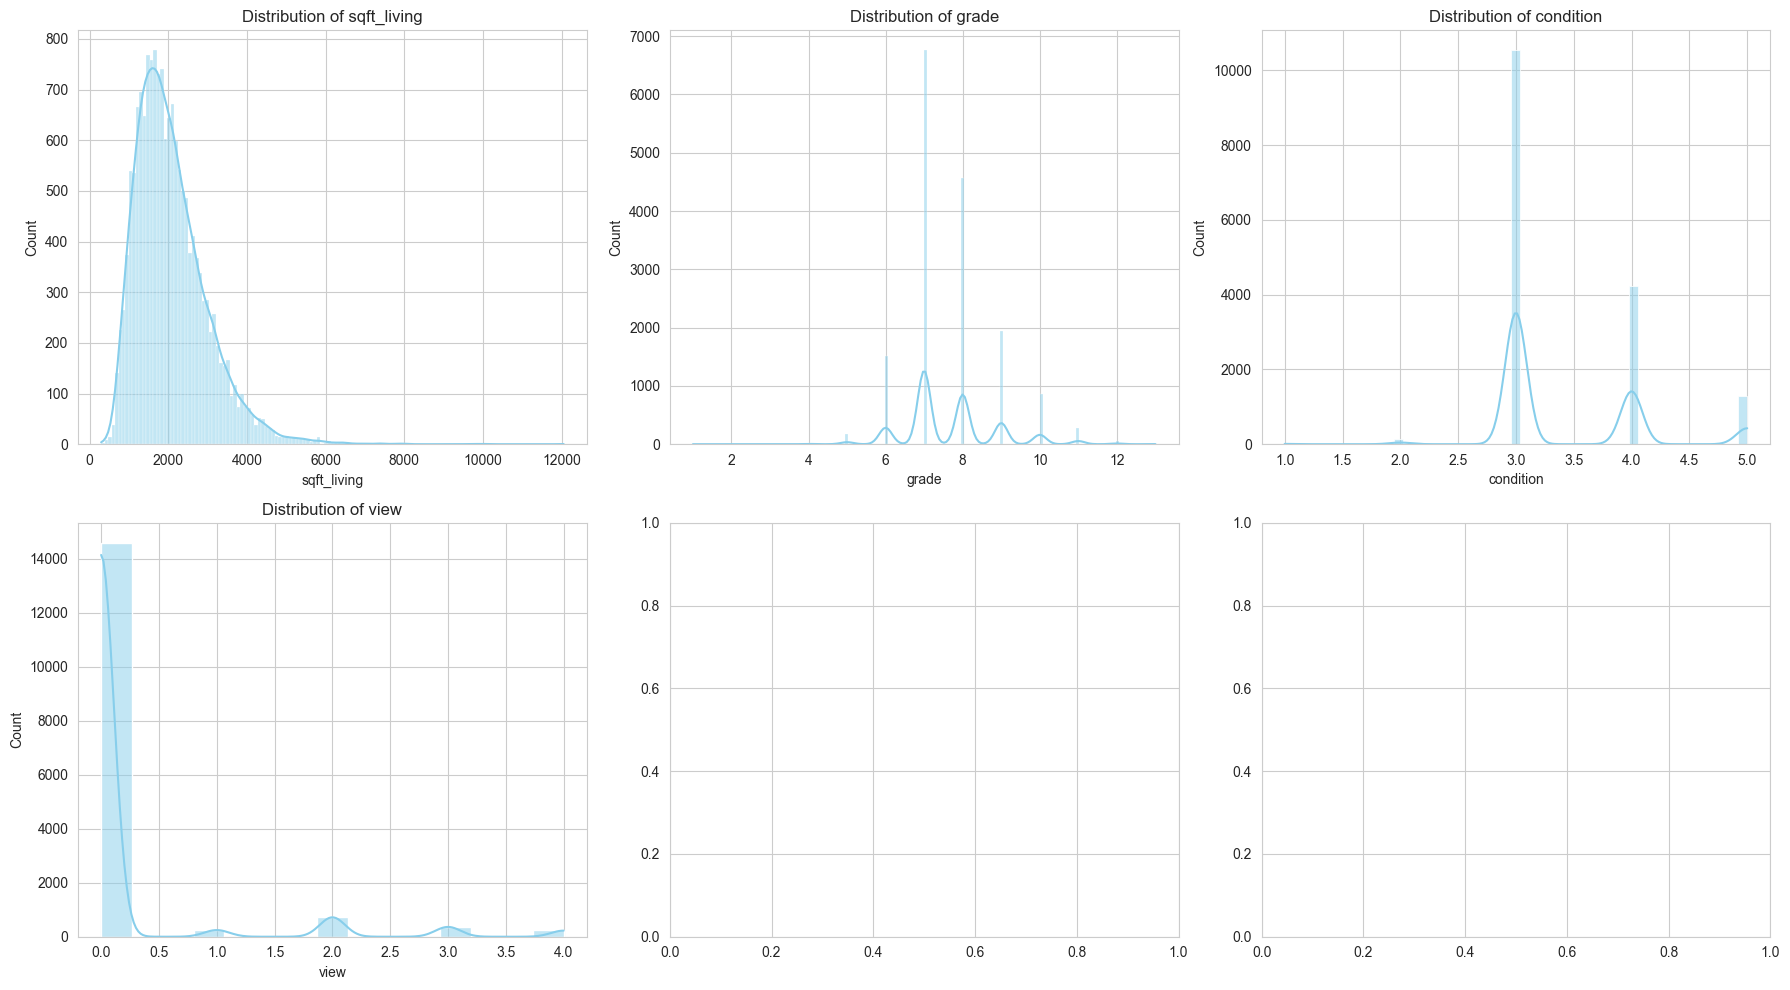

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for professional report
sns.set_style("whitegrid")
features_to_plot = ['sqft_living', 'grade', 'condition', 'view', 'waterfront']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(features_size):
    if i < len(features_to_plot):
        sns.histplot(df[features_to_plot[i]], kde=True, ax=axes[i], color='skyblue')
        axes[i].set_title(f'Distribution of {features_to_plot[i]}')

plt.tight_layout()
plt.show()

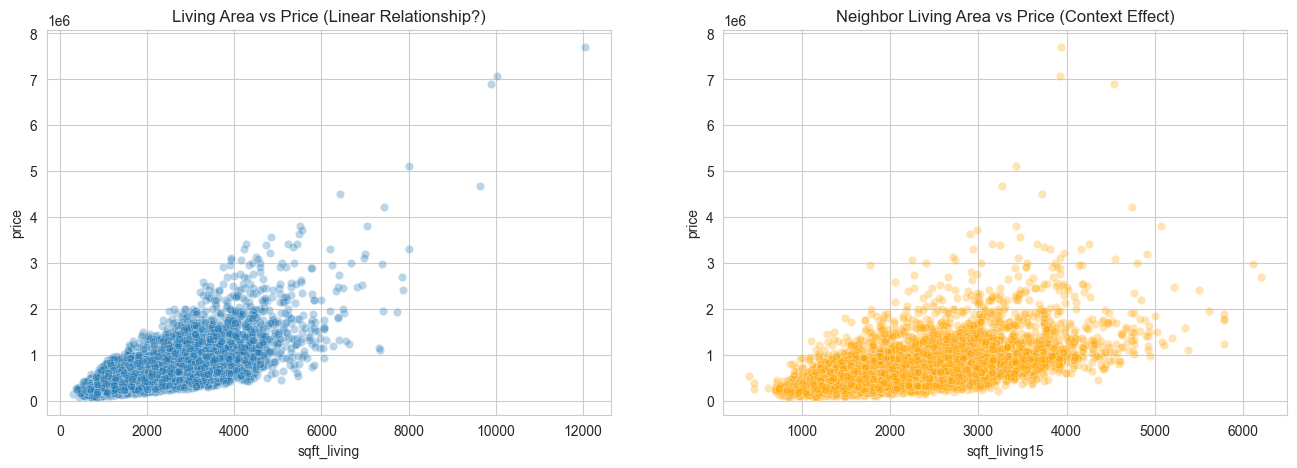

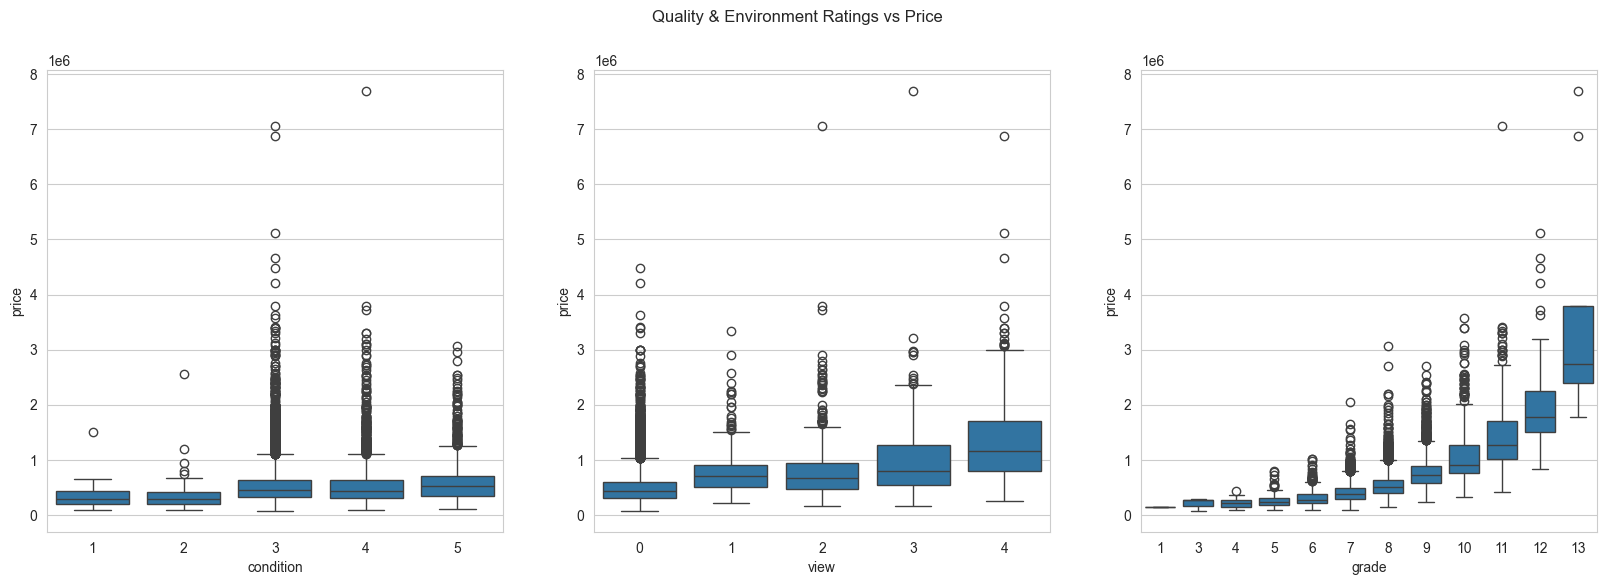

In [8]:
# size vs price
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='sqft_living', y='price', alpha=0.3)
plt.title('Living Area vs Price (Linear Relationship?)')

# neighborhood size vs price
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='sqft_living15', y='price', alpha=0.3, color='orange')
plt.title('Neighbor Living Area vs Price (Context Effect)')
plt.show()

# Categorical vs Price
fig, ax = plt.subplots(1, 3, figsize=(20, 6))
sns.boxplot(x='condition', y='price', data=df, ax=ax[0])
sns.boxplot(x='view', y='price', data=df, ax=ax[1])
sns.boxplot(x='grade', y='price', data=df, ax=ax[2])
plt.suptitle('Quality & Environment Ratings vs Price')
plt.show()

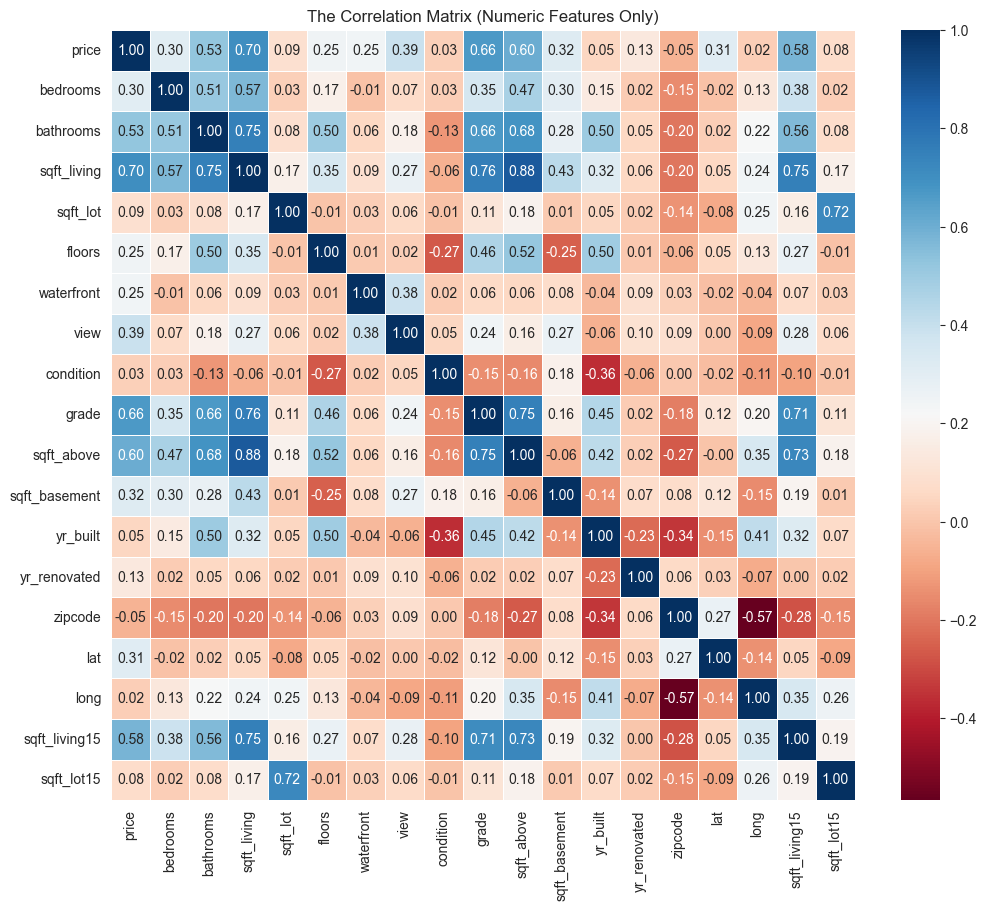

<Figure size 1000x600 with 0 Axes>

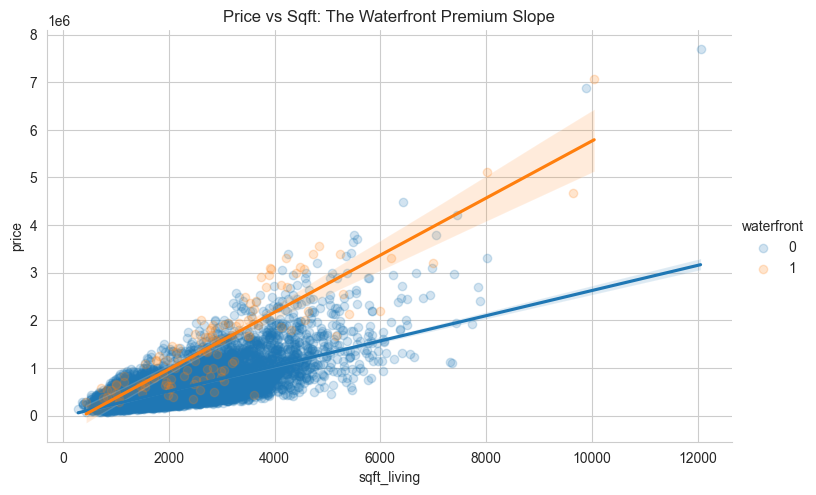

In [10]:
# 1. Heatmap of all features
# 1. Select only numeric columns (this removes the 'date' and 'id' columns)
# We also drop 'id' because correlating an ID number is meaningless
numeric_df = df.select_dtypes(include=[np.number]).drop(columns=['id'], errors='ignore')

# 2. Plot the Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='RdBu', fmt='.2f', linewidths=0.5)
plt.title('The Correlation Matrix (Numeric Features Only)')
plt.show()

# 2. The "Luxury Multiplier"
# We check if being Waterfront changes the 'Price per Sqft' slope
plt.figure(figsize=(10, 6))
sns.lmplot(data=df, x='sqft_living', y='price', hue='waterfront', aspect=1.5, scatter_kws={'alpha':0.2})
plt.title('Price vs Sqft: The Waterfront Premium Slope')
plt.show()

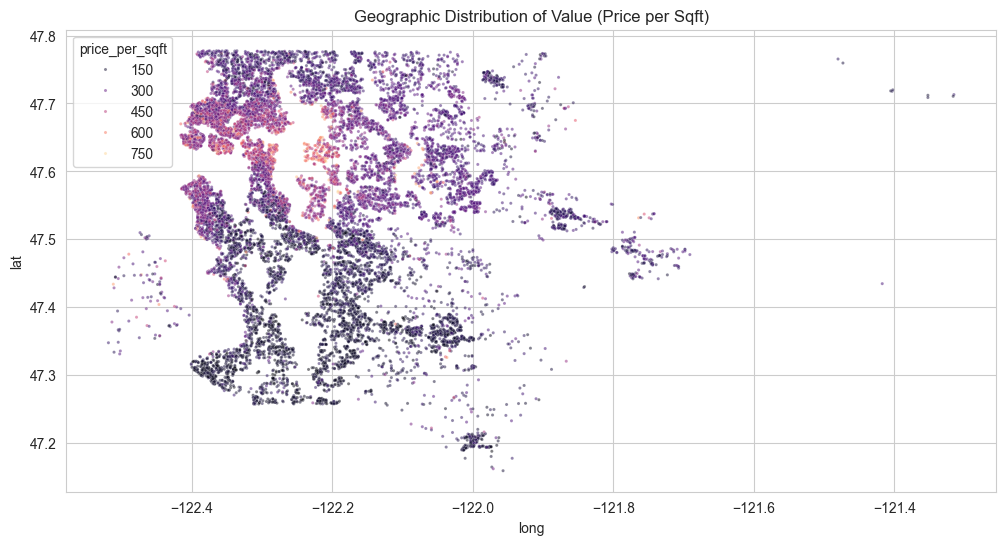

In [11]:
# Create a new temporary feature for analysis
df['price_per_sqft'] = df['price'] / df['sqft_living']

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='long', y='lat', hue='price_per_sqft', palette='magma', s=5, alpha=0.5)
plt.title('Geographic Distribution of Value (Price per Sqft)')
plt.show()

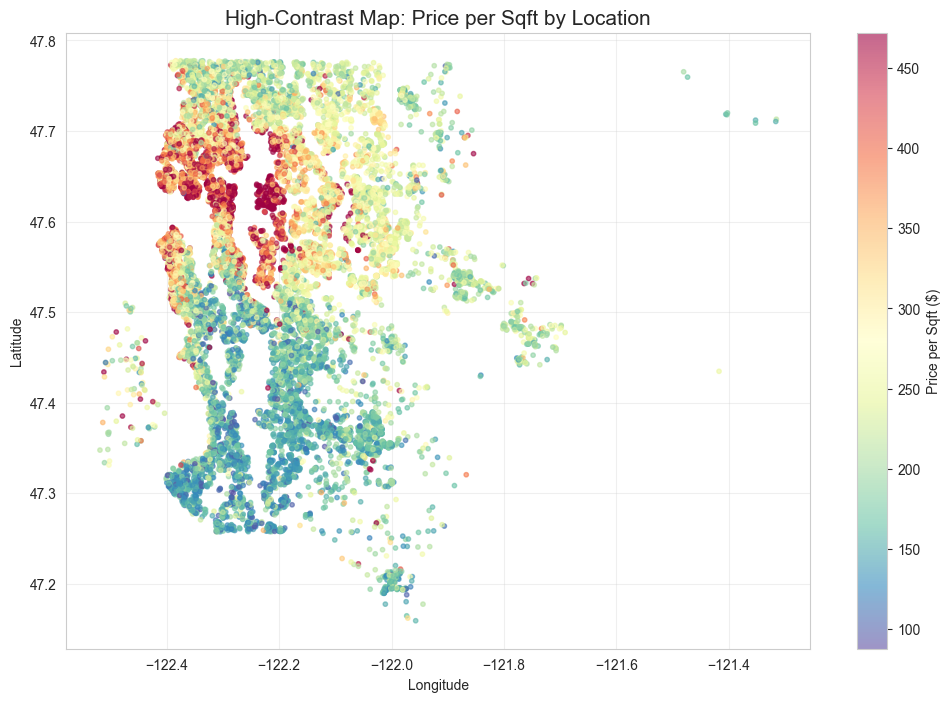

In [12]:
plt.figure(figsize=(12, 8))

# We use 'robust=True' and a high-contrast palette
# Spectral or RdYlBu are great for seeing distinct clusters
scatter = plt.scatter(df['long'], df['lat'], 
            c=df['price_per_sqft'], 
            cmap='Spectral_r', # Red is expensive, Blue is cheaper
            s=10, 
            alpha=0.6,
            vmax=np.percentile(df['price_per_sqft'], 95)) # Limits range to 95th percentile to ignore extreme outliers

plt.colorbar(scatter, label='Price per Sqft ($)')
plt.title('High-Contrast Map: Price per Sqft by Location', fontsize=15)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True, alpha=0.3)
plt.show()

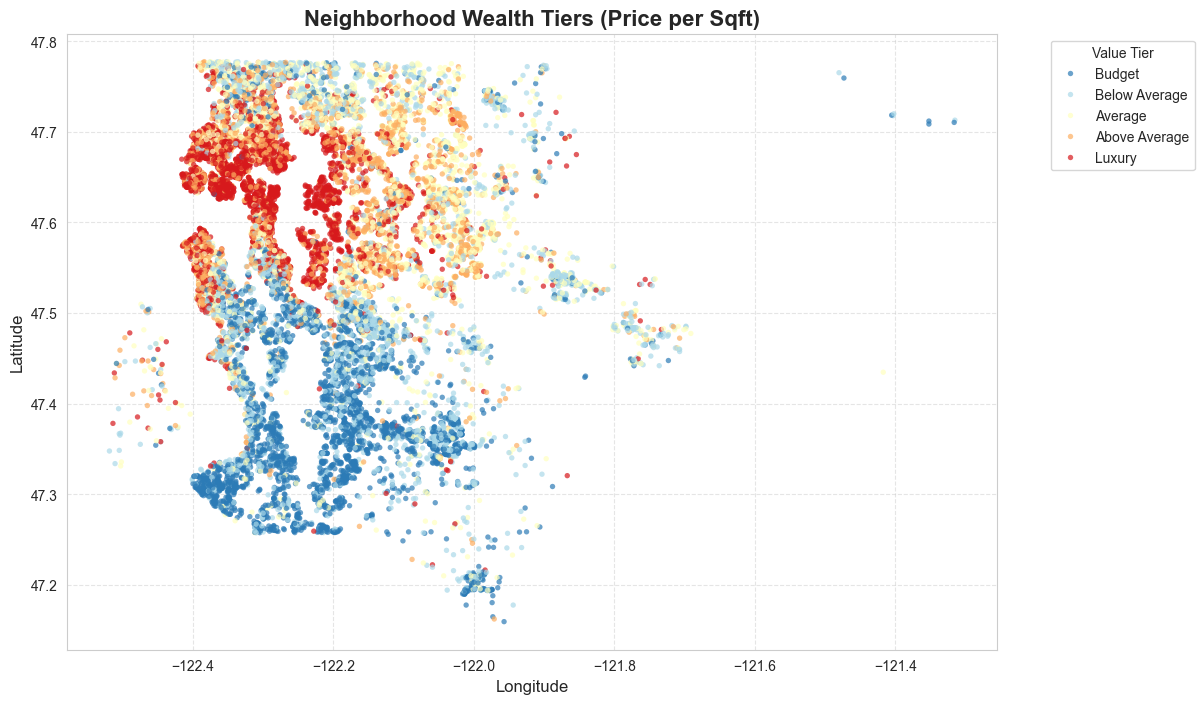

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Create Price Tiers (Bining)
# This creates 5 categories based on the distribution of Price per Sqft
df['value_tier'] = pd.qcut(df['price_per_sqft'], q=5, 
                           labels=['Budget', 'Below Average', 'Average', 'Above Average', 'Luxury'])

# 2. Plotting with Hue
plt.figure(figsize=(12, 8))

# Define a high-contrast color palette
tier_colors = {"Budget": "#2c7bb6",         # Dark Blue
               "Below Average": "#abd9e9",  # Light Blue
               "Average": "#ffffbf",        # Yellow
               "Above Average": "#fdae61",  # Orange
               "Luxury": "#d7191c"}         # Bright Red

sns.scatterplot(data=df, x='long', y='lat', 
                hue='value_tier', 
                palette=tier_colors, 
                s=15, 
                alpha=0.7, 
                edgecolor='none')

plt.title('Neighborhood Wealth Tiers (Price per Sqft)', fontsize=16, fontweight='bold')
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.legend(title='Value Tier', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

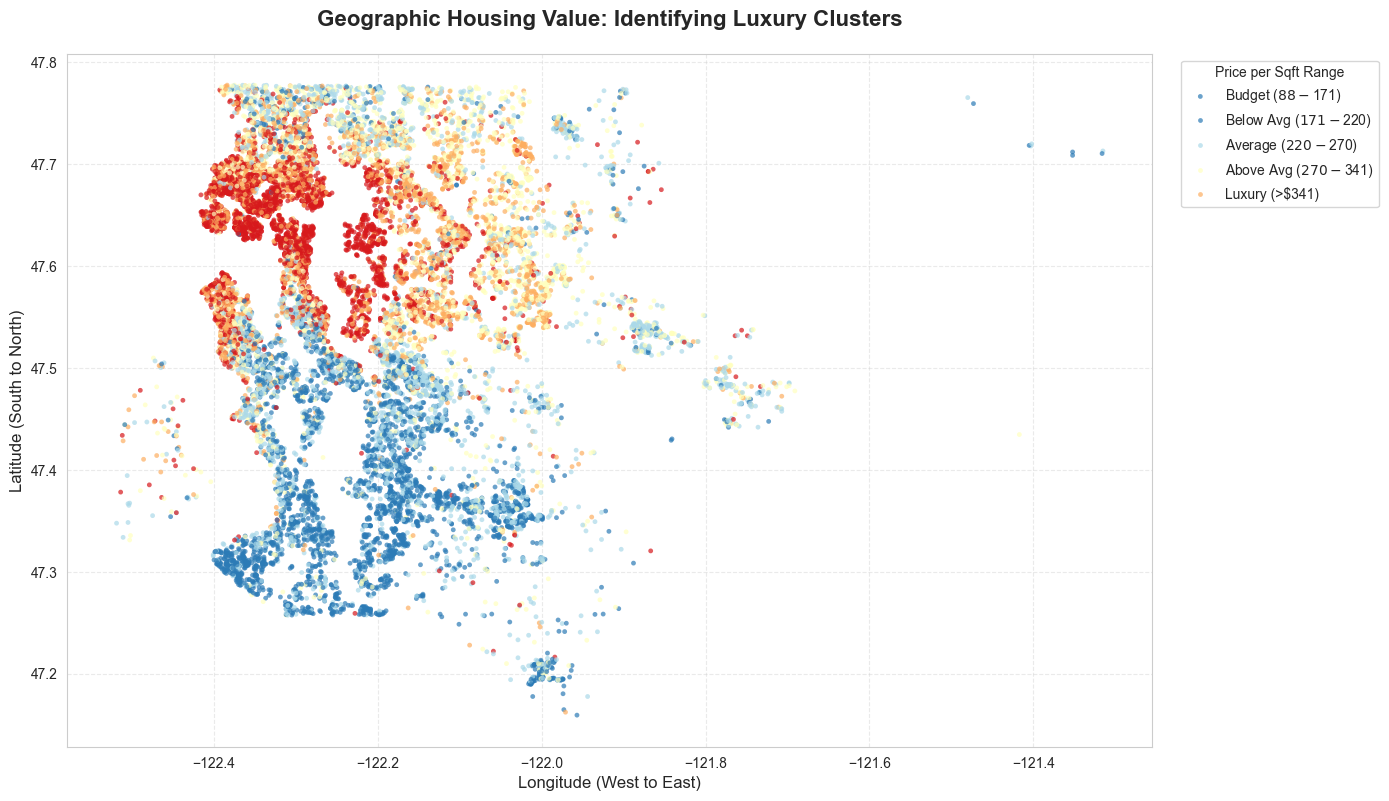

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Calculate Price per Sqft if not already done
df['price_per_sqft'] = df['price'] / df['sqft_living']

# 2. Define the Tiers and calculate their actual Dollar ranges for the Legend
# We use 5 bins (Quintiles)
df['value_tier'], bins = pd.qcut(df['price_per_sqft'], q=5, retbins=True, 
                                 labels=['Budget', 'Below Average', 'Average', 'Above Average', 'Luxury'])

# Create labels that show the price range (e.g., "Luxury ($450 - $1200)")
labels = [
    f"Budget (${bins[0]:.0f} - ${bins[1]:.0f})",
    f"Below Avg (${bins[1]:.0f} - ${bins[2]:.0f})",
    f"Average (${bins[2]:.0f} - ${bins[3]:.0f})",
    f"Above Avg (${bins[3]:.0f} - ${bins[4]:.0f})",
    f"Luxury (>${bins[4]:.0f})"
]

# 3. Plotting
plt.figure(figsize=(14, 9))

# High-contrast palette: Blue (Cheap) to Red (Expensive)
tier_colors = ["#2c7bb6", "#abd9e9", "#ffffbf", "#fdae61", "#d7191c"]

# Use the 'hue' parameter and pass our custom labels to the legend
ax = sns.scatterplot(data=df, x='long', y='lat', 
                hue='value_tier', 
                palette=tier_colors, 
                s=12, 
                alpha=0.7, 
                edgecolor='none')

# Customizing the Legend to be informative
plt.legend(title='Price per Sqft Range', labels=labels, bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=10)

plt.title('Geographic Housing Value: Identifying Luxury Clusters', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Longitude (West to East)', fontsize=12)
plt.ylabel('Latitude (South to North)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.4)

plt.show()

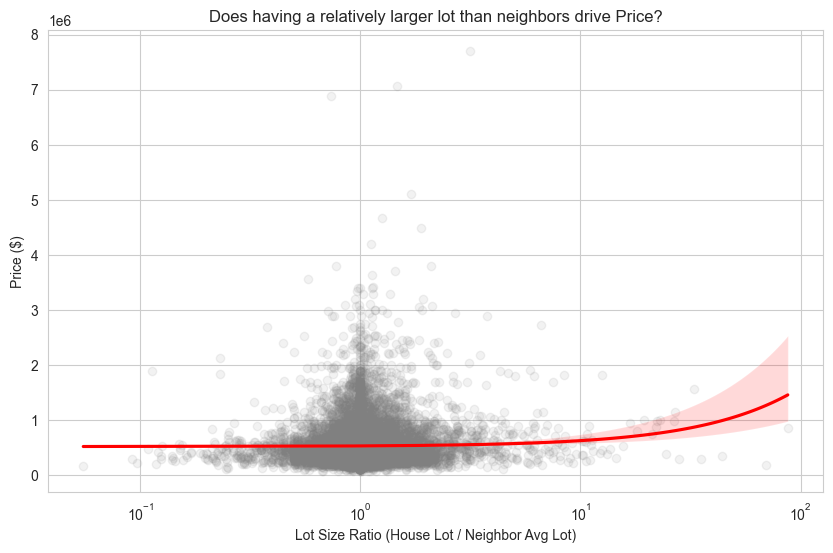

In [15]:
# Create a ratio: Is my lot bigger ( > 1) or smaller ( < 1) than the neighborhood average?
df['lot_ratio'] = df['sqft_lot'] / df['sqft_lot15']

plt.figure(figsize=(10, 6))
# We use a log scale for the x-axis because lot sizes vary wildly
sns.regplot(data=df, x='lot_ratio', y='price', 
            scatter_kws={'alpha':0.1, 'color':'gray'}, 
            line_kws={'color':'red'})
plt.xscale('log')
plt.title('Does having a relatively larger lot than neighbors drive Price?')
plt.xlabel('Lot Size Ratio (House Lot / Neighbor Avg Lot)')
plt.ylabel('Price ($)')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_16728\1621997339.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grade_summary, x='grade', y='mean', palette='viridis')


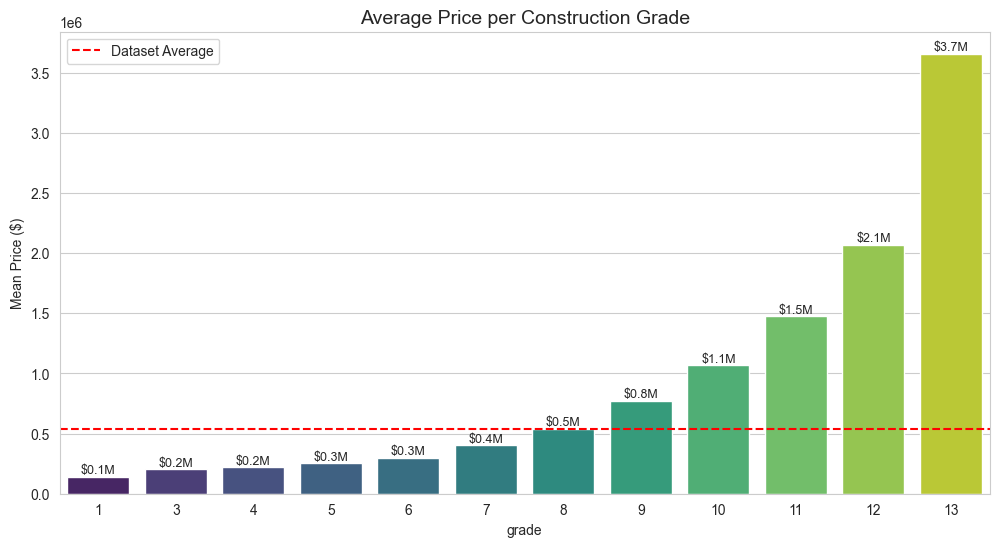

In [16]:
grade_summary = df.groupby('grade')['price'].agg(['mean', 'median', 'count']).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=grade_summary, x='grade', y='mean', palette='viridis')
plt.axhline(df['price'].mean(), color='red', linestyle='--', label='Dataset Average')
plt.title('Average Price per Construction Grade', fontsize=14)
plt.ylabel('Mean Price ($)')
plt.legend()

# Adding text labels on top of bars for your report
for i, val in enumerate(grade_summary['mean']):
    plt.text(i, val, f'${val/1e6:.1f}M', ha='center', va='bottom', fontsize=9)

plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_16728\3621296462.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='has_basement', y='price', palette='Set2')


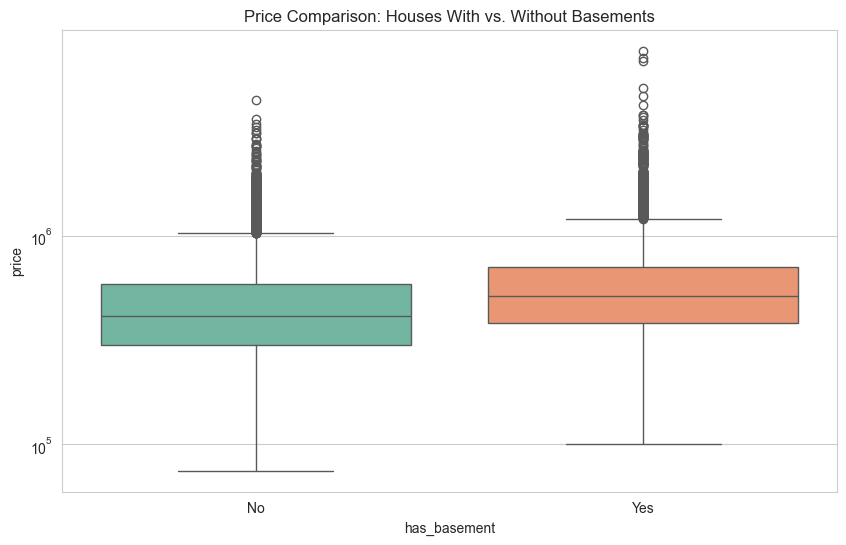

In [17]:
# Create a binary column: Does it have a basement?
df['has_basement'] = df['sqft_basement'].apply(lambda x: 'Yes' if x > 0 else 'No')

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='has_basement', y='price', palette='Set2')
plt.yscale('log') # Using log scale to see the distribution better
plt.title('Price Comparison: Houses With vs. Without Basements')
plt.show()

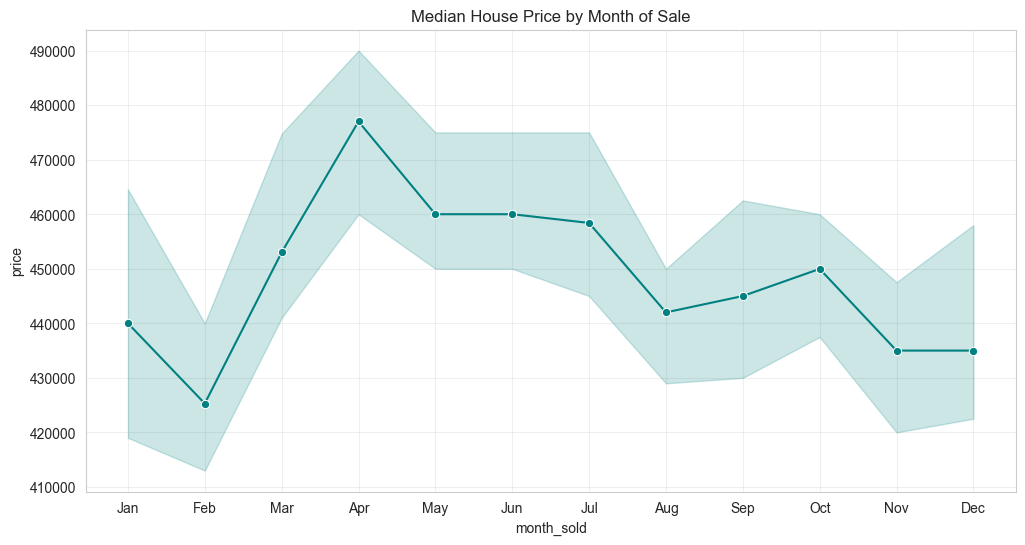

In [18]:
# Convert the weird date string '20150505T000000' into a readable date
df['date_cleaned'] = pd.to_datetime(df['date'].str.slice(0, 8), format='%Y%m%d')

# Extract the Month
df['month_sold'] = df['date_cleaned'].dt.month

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='month_sold', y='price', estimator='median', color='teal', marker='o')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('Median House Price by Month of Sale')
plt.grid(True, alpha=0.3)
plt.show()

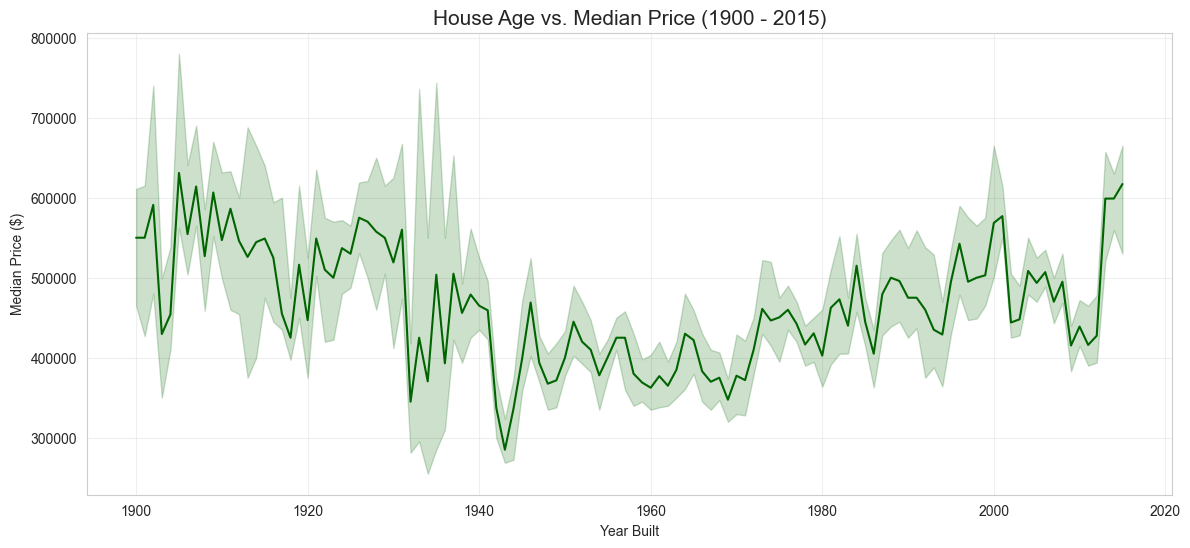

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

# We'll use a line plot to see the trend over time
sns.lineplot(data=df, x='yr_built', y='price', estimator='median', color='darkgreen')

plt.title('House Age vs. Median Price (1900 - 2015)', fontsize=15)
plt.xlabel('Year Built')
plt.ylabel('Median Price ($)')
plt.grid(True, alpha=0.3)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_16728\2772157515.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='floors', y='price', palette='magma')


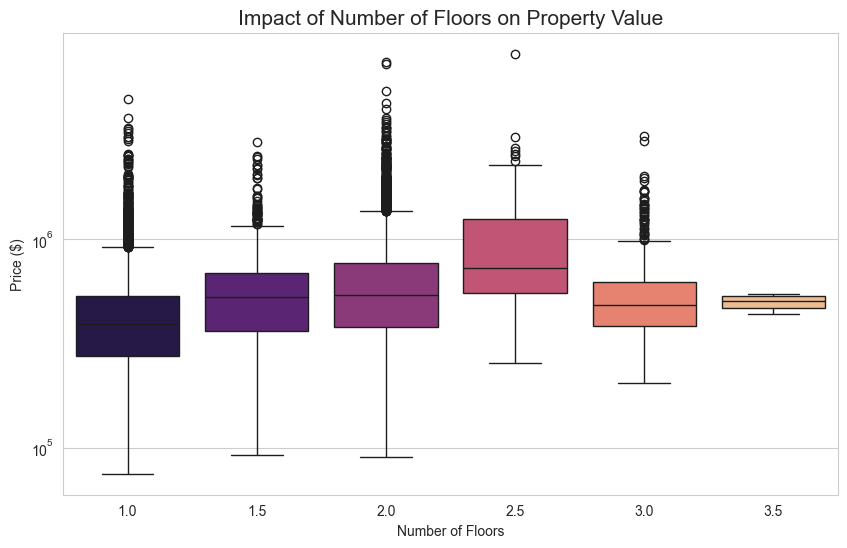

In [21]:
plt.figure(figsize=(10, 6))

# Boxplot is best for 'floors' because it's a discrete number (1, 1.5, 2, etc.)
sns.boxplot(data=df, x='floors', y='price', palette='magma')

plt.title('Impact of Number of Floors on Property Value', fontsize=15)
plt.xlabel('Number of Floors')
plt.ylabel('Price ($)')
plt.yscale('log') # Log scale helps see the distribution across price gaps
plt.show()

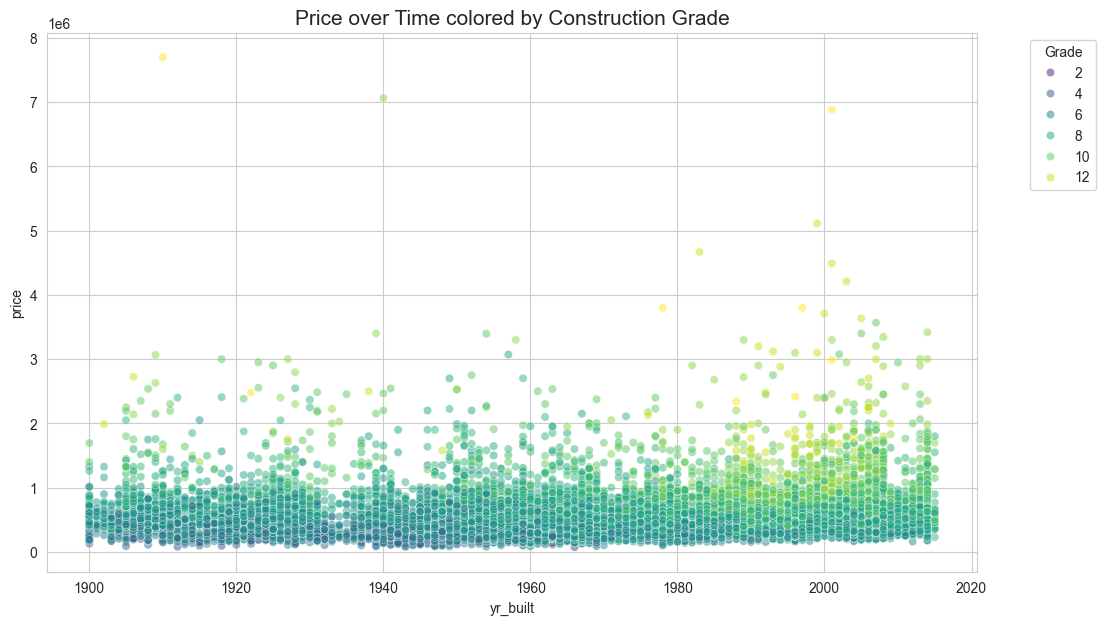

In [22]:
plt.figure(figsize=(12, 7))

# Scatter plot: Year Built vs Price, colored by Grade
sns.scatterplot(data=df, x='yr_built', y='price', hue='grade', palette='viridis', alpha=0.5)

plt.title('Price over Time colored by Construction Grade', fontsize=15)
plt.legend(title='Grade', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [23]:
# Waterfront Counts
print("--- Waterfront Stats ---")
print(df['waterfront'].value_counts())
print(f"Percentage: {df['waterfront'].value_counts(normalize=True)[1]*100:.2f}%")

# Floors Counts
print("\n--- Floors Stats ---")
print(df['floors'].value_counts().sort_index())

--- Waterfront Stats ---
waterfront
0    16096
1      113
Name: count, dtype: int64
Percentage: 0.70%

--- Floors Stats ---
floors
1.0    7970
1.5    1414
2.0    6215
2.5     117
3.0     489
3.5       4
Name: count, dtype: int64


In [24]:
# Create a Pivot Table to see the interaction
median_pivot = df.pivot_table(values='price', 
                               index='floors', 
                               columns='waterfront', 
                               aggfunc='median')

# Rename columns for clarity in the printout
median_pivot.columns = ['No Waterfront', 'Waterfront']

print("--- Median Prices by Floor and Waterfront Status ---")
display(median_pivot.style.format("${:,.0f}"))

--- Median Prices by Floor and Waterfront Status ---


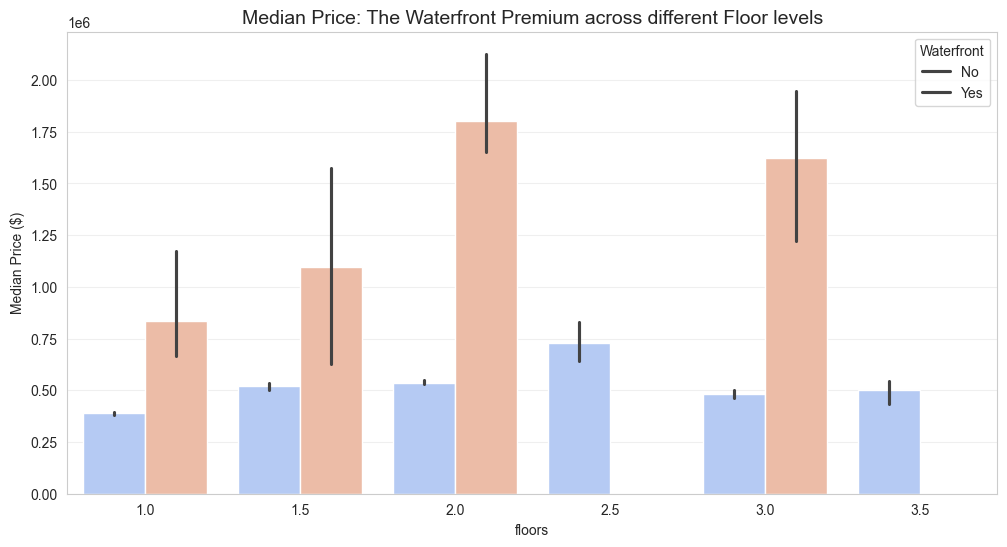

In [25]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='floors', y='price', hue='waterfront', estimator=np.median, palette='coolwarm')

plt.title('Median Price: The Waterfront Premium across different Floor levels', fontsize=14)
plt.ylabel('Median Price ($)')
plt.legend(title='Waterfront', labels=['No', 'Yes'])
plt.grid(axis='y', alpha=0.3)
plt.show()

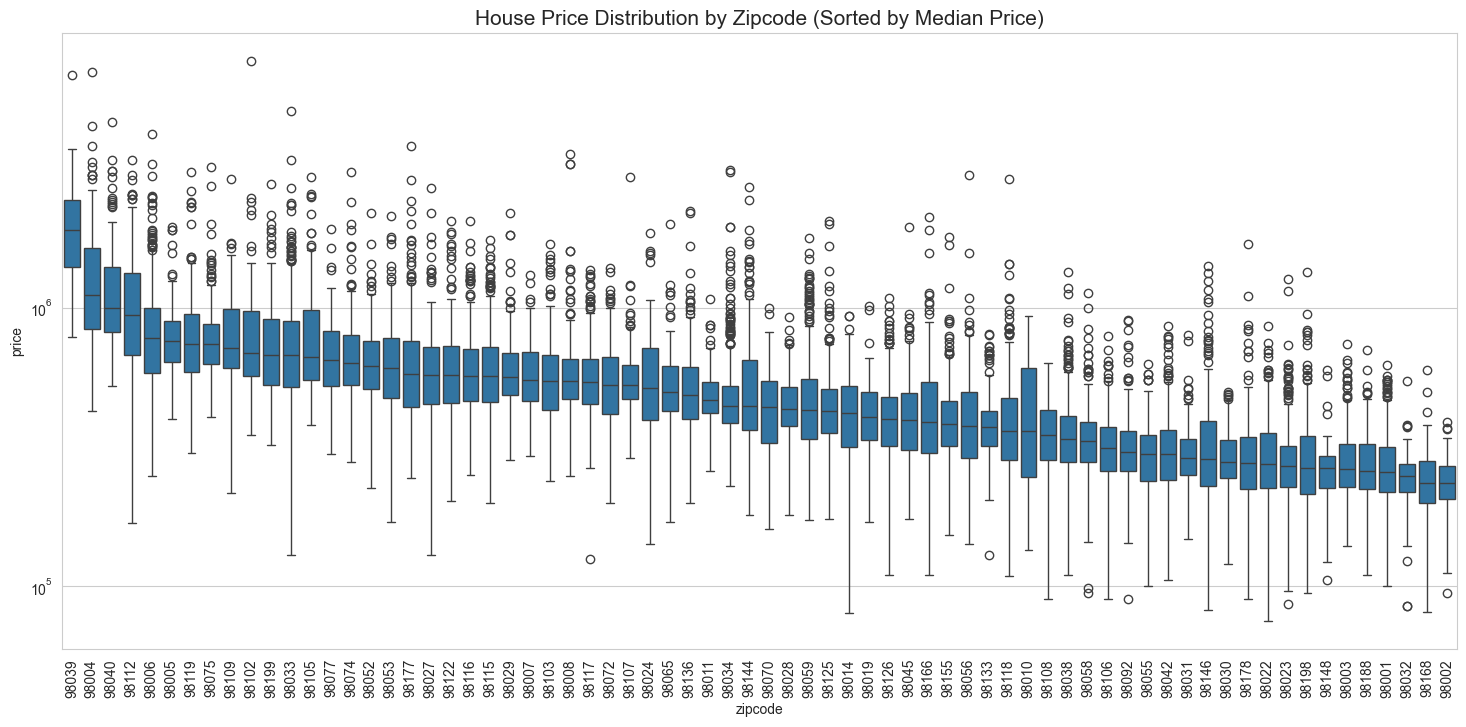

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average price per zipcode and sort it
zip_order = df.groupby('zipcode')['price'].median().sort_values(ascending=False).index

plt.figure(figsize=(18, 8))
sns.boxplot(data=df, x='zipcode', y='price', order=zip_order)

plt.xticks(rotation=90)
plt.title('House Price Distribution by Zipcode (Sorted by Median Price)', fontsize=15)
plt.yscale('log') # Log scale helps see the spread clearly
plt.show()

In [27]:
# Grouping to find the actual numbers
zip_stats = df.groupby('zipcode')['price'].agg(['median', 'count']).sort_values(by='median', ascending=False)

print("Top 5 Most Expensive Zipcodes:")
print(zip_stats.head(5))

print("\nTop 5 Most Affordable Zipcodes:")
print(zip_stats.tail(5))

Top 5 Most Expensive Zipcodes:
            median  count
zipcode                  
98039    1905000.0     37
98004    1110000.0    235
98040     997000.0    204
98112     940000.0    207
98006     779500.0    380

Top 5 Most Affordable Zipcodes:
           median  count
zipcode                 
98188    259000.0    103
98001    258000.0    271
98032    249000.0     91
98168    235000.0    201
98002    235000.0    151


--- Renovation Impact ---
Median Price (Not Renovated): $447,000
Median Price (Renovated):     $600,000


C:\Users\user\AppData\Local\Temp\ipykernel_16728\4028590578.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='is_renovated', y='price', palette='Set1')


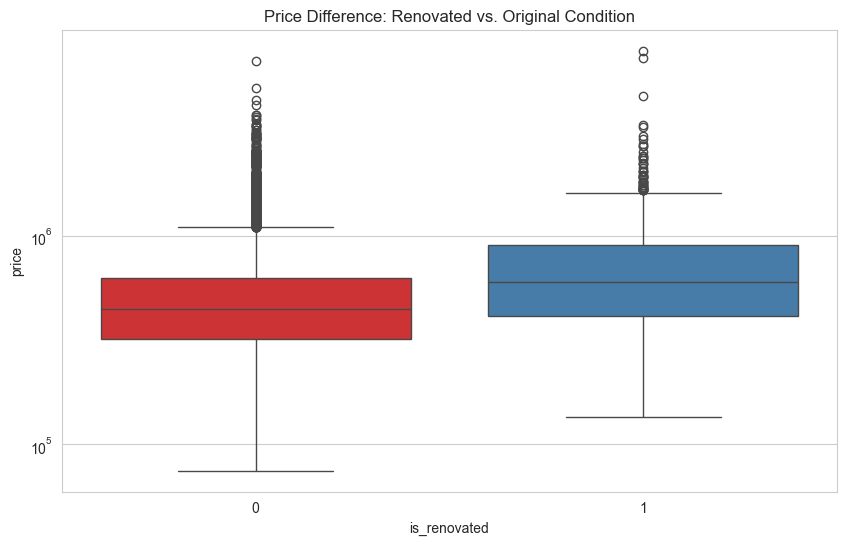

In [28]:
# Create a binary column: Was it ever renovated?
df['is_renovated'] = df['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)

# Calculate the price difference
renovation_impact = df.groupby('is_renovated')['price'].median()

print("--- Renovation Impact ---")
print(f"Median Price (Not Renovated): ${renovation_impact[0]:,.0f}")
print(f"Median Price (Renovated):     ${renovation_impact[1]:,.0f}")

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='is_renovated', y='price', palette='Set1')
plt.yscale('log')
plt.title('Price Difference: Renovated vs. Original Condition')
plt.show()

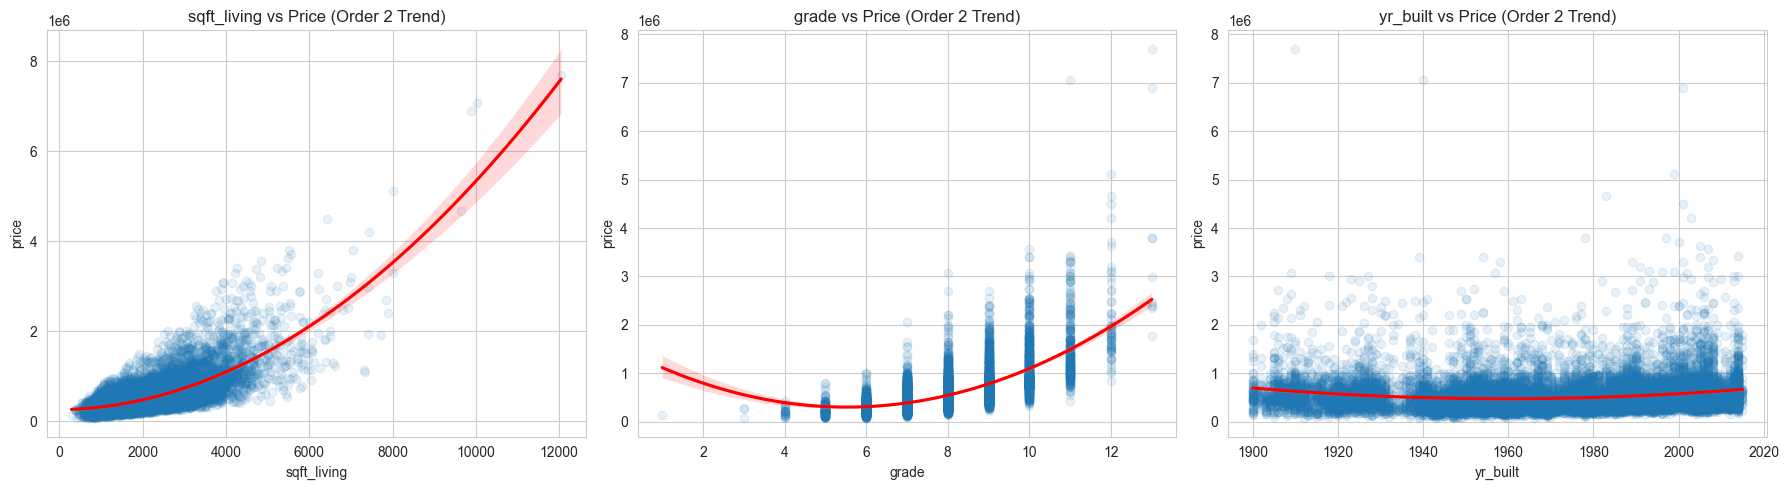

In [29]:
# Checking for non-linear relationships
features_to_check = ['sqft_living', 'grade', 'yr_built']

plt.figure(figsize=(18, 5))
for i, col in enumerate(features_to_check):
    plt.subplot(1, 3, i+1)
    sns.regplot(data=df, x=col, y='price', scatter_kws={'alpha':0.1}, order=2, line_kws={'color':'red'})
    plt.title(f'{col} vs Price (Order 2 Trend)')
plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_16728\1005228123.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='bedrooms', y='price', palette='magma')


--- Median Price by Bedroom Count ---
bedrooms
0     $264,000
1     $302,975
2     $374,975
3     $415,000
4     $549,450
5     $615,000
6     $635,000
7     $599,500
8     $680,000
9     $934,000
10    $899,000
33    $640,000
Name: price, dtype: object


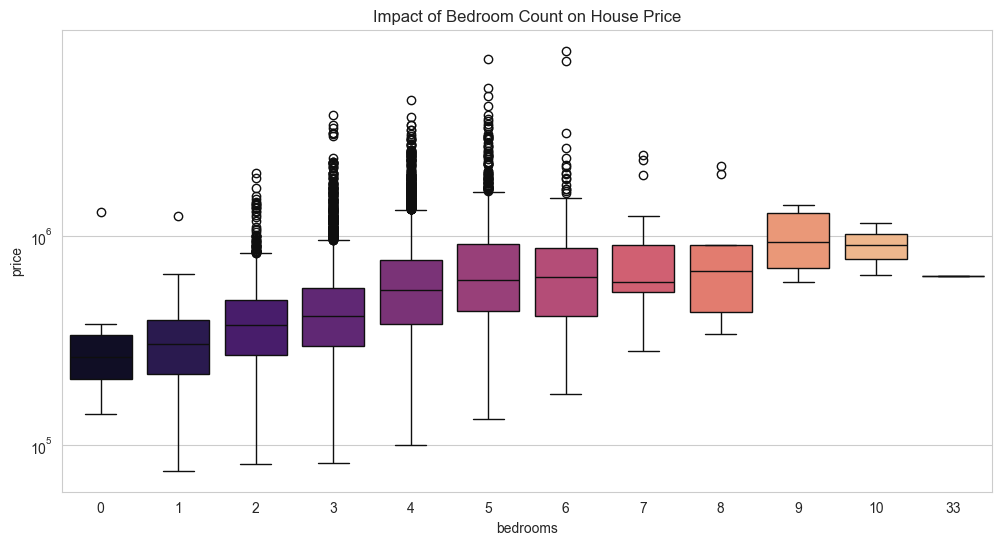

In [30]:
plt.figure(figsize=(12, 6))

# Boxplot to see distribution of price for each bedroom count
sns.boxplot(data=df, x='bedrooms', y='price', palette='magma')
plt.yscale('log')
plt.title('Impact of Bedroom Count on House Price')

# Summary table for your report
print("--- Median Price by Bedroom Count ---")
print(df.groupby('bedrooms')['price'].median().apply(lambda x: f"${x:,.0f}"))

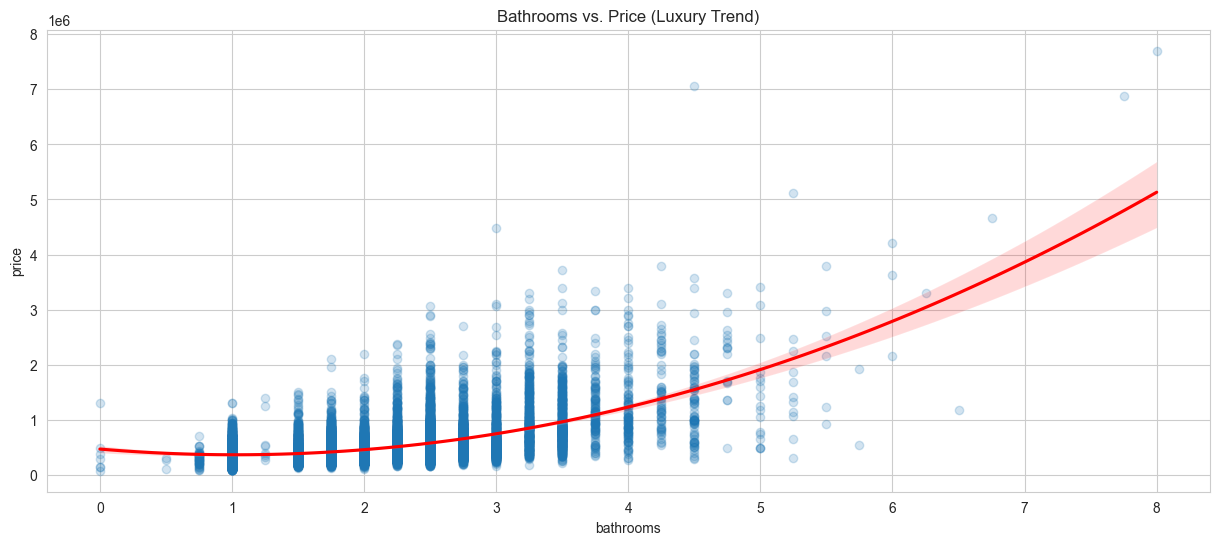

In [31]:
plt.figure(figsize=(15, 6))

# Since there are many bathroom increments, a scatter plot with a trend line is clearer
sns.regplot(data=df, x='bathrooms', y='price', scatter_kws={'alpha':0.2}, line_kws={'color':'red'}, order=2)

plt.title('Bathrooms vs. Price (Luxury Trend)')
plt.show()

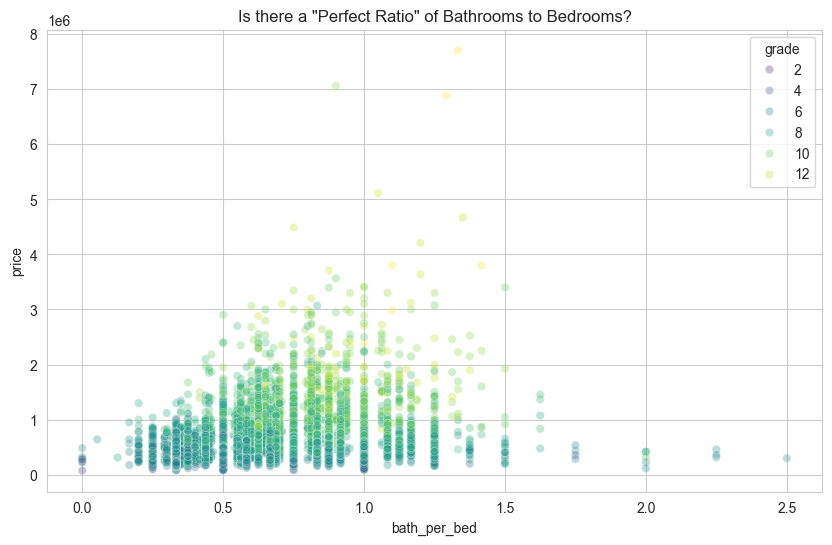

In [32]:
# Create a new feature for the analysis
df['bath_per_bed'] = df['bathrooms'] / df['bedrooms']

# Clean up infinite values (if a house has 0 bedrooms)
df['bath_per_bed'] = df['bath_per_bed'].replace([np.inf, -np.inf], 0)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='bath_per_bed', y='price', alpha=0.3, hue='grade', palette='viridis')
plt.title('Is there a "Perfect Ratio" of Bathrooms to Bedrooms?')
plt.show()

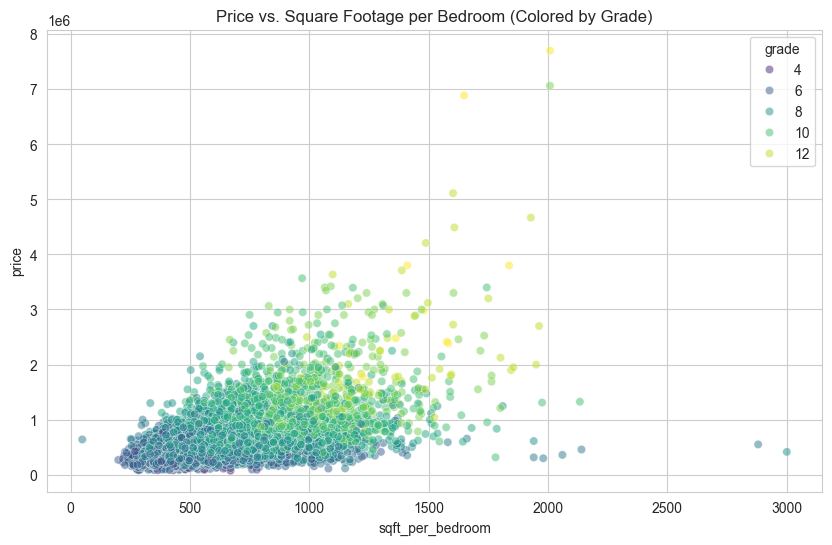

In [33]:
# Feature Engineering: Average size of each bedroom (including common areas)
df['sqft_per_bedroom'] = df['sqft_living'] / df['bedrooms']

# Clean up houses with 0 bedrooms to avoid errors
df_temp = df[df['bedrooms'] > 0]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_temp, x='sqft_per_bedroom', y='price', hue='grade', palette='viridis', alpha=0.5)
plt.title('Price vs. Square Footage per Bedroom (Colored by Grade)')
plt.show()

In [34]:
# Finding the suspicious house
outlier = df[df['bedrooms'] >= 10]
print("Houses with 10+ Bedrooms:")
display(outlier[['id', 'bedrooms', 'bathrooms', 'sqft_living', 'price']])

Houses with 10+ Bedrooms:


id  bedrooms  bathrooms  sqft_living    price
3193   2402100895        33       1.75         1620   640000
5777    627300145        10       5.25         4590  1148000
11710  5566100170        10       2.00         3610   650000

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16209 entries, 0 to 16208
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                16209 non-null  int64         
 1   date              16209 non-null  object        
 2   price             16209 non-null  int64         
 3   bedrooms          16209 non-null  int64         
 4   bathrooms         16209 non-null  float64       
 5   sqft_living       16209 non-null  int64         
 6   sqft_lot          16209 non-null  int64         
 7   floors            16209 non-null  float64       
 8   waterfront        16209 non-null  int64         
 9   view              16209 non-null  int64         
 10  condition         16209 non-null  int64         
 11  grade             16209 non-null  int64         
 12  sqft_above        16209 non-null  int64         
 13  sqft_basement     16209 non-null  int64         
 14  yr_built          1620

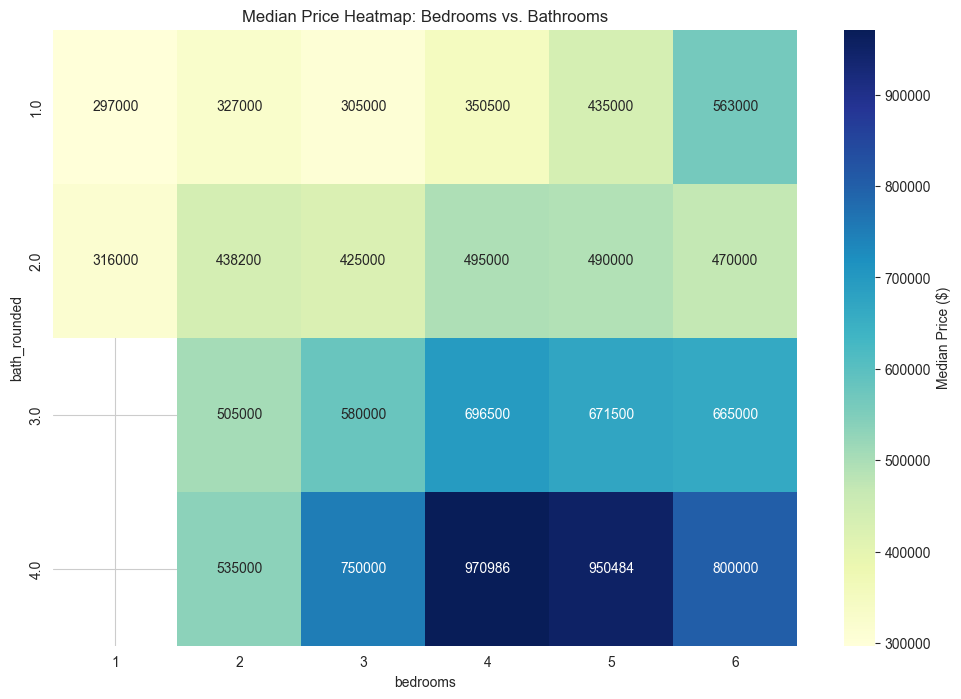

In [36]:
# Round bathrooms to the nearest whole number for a cleaner heatmap
df['bath_rounded'] = df['bathrooms'].round()

# Filter for the most common ranges to avoid a messy chart
filter_df = df[(df['bedrooms'].between(1, 6)) & (df['bath_rounded'].between(1, 4))]

pivot_table = filter_df.pivot_table(values='price', 
                                    index='bath_rounded', 
                                    columns='bedrooms', 
                                    aggfunc='median')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu", cbar_kws={'label': 'Median Price ($)'})
plt.title('Median Price Heatmap: Bedrooms vs. Bathrooms')
plt.show()

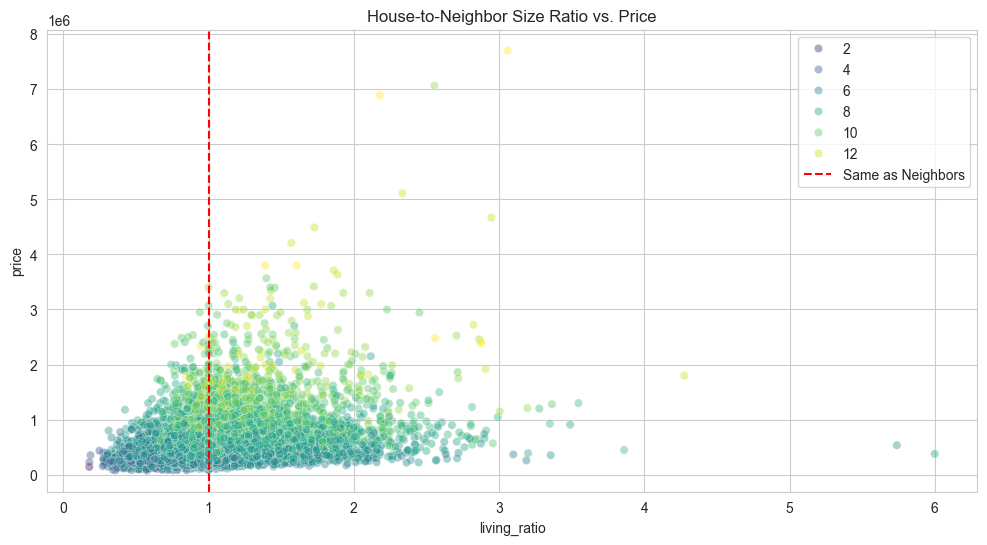

In [37]:
# Create a ratio: How much bigger is the house than its neighbors?
df['living_ratio'] = df['sqft_living'] / df['sqft_living15']

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='living_ratio', y='price', hue='grade', palette='viridis', alpha=0.4)
plt.axvline(1, color='red', linestyle='--', label='Same as Neighbors')
plt.title('House-to-Neighbor Size Ratio vs. Price')
plt.legend()
plt.show()

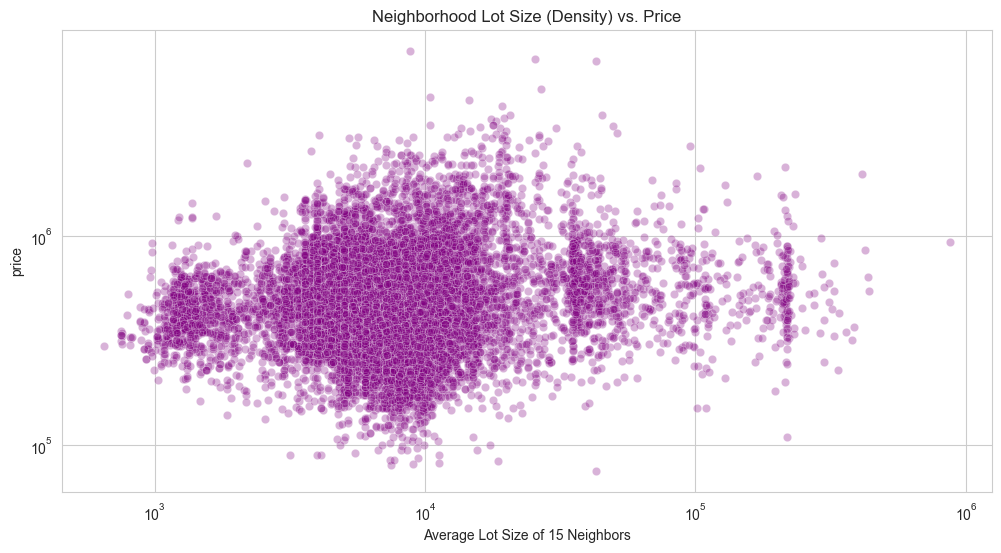

In [38]:
plt.figure(figsize=(12, 6))
# Compare the Lot size of the house vs the average lot size of neighbors
sns.scatterplot(data=df, x='sqft_lot15', y='price', alpha=0.3, color='purple')
plt.xscale('log') # Lot sizes vary massively, so log scale is better
plt.yscale('log')
plt.title('Neighborhood Lot Size (Density) vs. Price')
plt.xlabel('Average Lot Size of 15 Neighbors')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_16728\1098851516.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_neighbor = df.pivot_table(values='price',


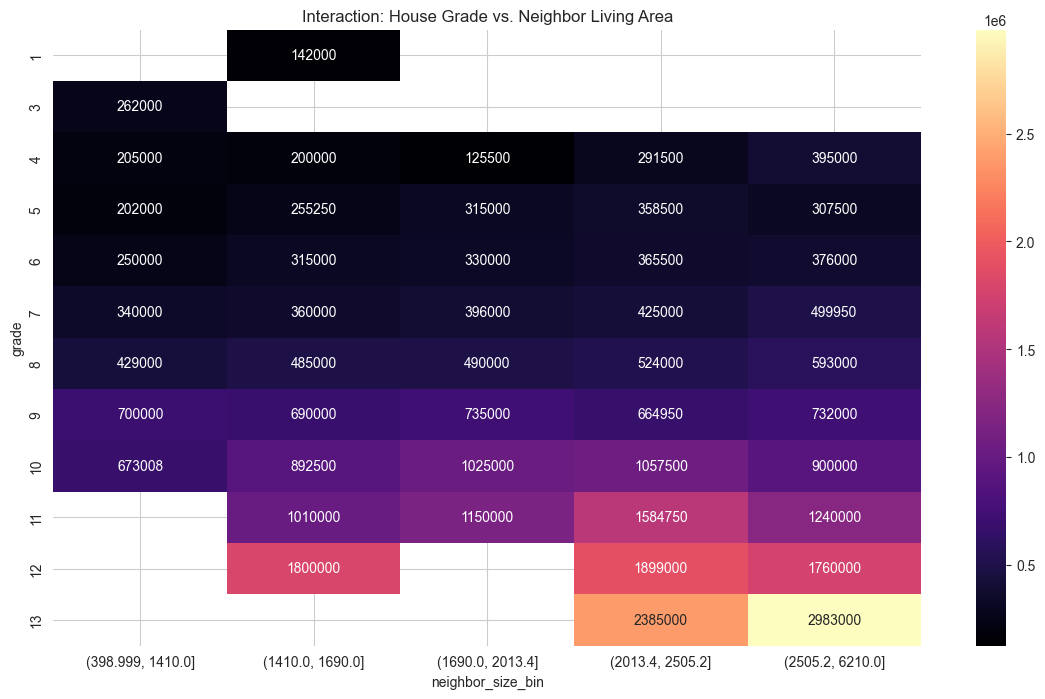

In [39]:
# We use a heatmap to see how Neighbor Size and House Grade interact to set Price
# Binning neighbor size for a cleaner heatmap
df['neighbor_size_bin'] = pd.qcut(df['sqft_living15'], 5)

pivot_neighbor = df.pivot_table(values='price', 
                                index='grade', 
                                columns='neighbor_size_bin', 
                                aggfunc='median')

plt.figure(figsize=(14, 8))
sns.heatmap(pivot_neighbor, annot=True, fmt=".0f", cmap="magma")
plt.title('Interaction: House Grade vs. Neighbor Living Area')
plt.show()

In [40]:
# List of discrete/categorical features we want to count
discrete_features = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']

print("--- RAW COUNTS FOR DISCRETE FEATURES ---\n")

for feature in discrete_features:
    print(f"Counts for: {feature.upper()}")
    # Sort index so the values (like 1, 2, 3 bedrooms) are in order
    print(df[feature].value_counts().sort_index())
    print("-" * 30)

--- RAW COUNTS FOR DISCRETE FEATURES ---

Counts for: BEDROOMS
bedrooms
0        8
1      142
2     2098
3     7380
4     5128
5     1213
6      197
7       26
8        9
9        5
10       2
33       1
Name: count, dtype: int64
------------------------------
Counts for: BATHROOMS
bathrooms
0.00       7
0.50       3
0.75      51
1.00    2891
1.25       8
1.50    1094
1.75    2283
2.00    1424
2.25    1532
2.50    4064
2.75     913
3.00     547
3.25     441
3.50     544
3.75     109
4.00     104
4.25      59
4.50      75
4.75      16
5.00      17
5.25      11
5.50       6
5.75       2
6.00       3
6.25       1
6.50       1
6.75       1
7.75       1
8.00       1
Name: count, dtype: int64
------------------------------
Counts for: FLOORS
floors
1.0    7970
1.5    1414
2.0    6215
2.5     117
3.0     489
3.5       4
Name: count, dtype: int64
------------------------------
Counts for: WATERFRONT
waterfront
0    16096
1      113
Name: count, dtype: int64
------------------------------
Count

In [41]:
# Check for null values in the entire dataframe
missing_values = df.isnull().sum()

# Display only the columns that have missing values (if any)
print("--- Missing Values Count ---")
print(missing_values[missing_values > 0])

# If the output is an empty list, your data is 100% clean!
if missing_values.sum() == 0:
    print("Great news! No missing values found in the dataset.")

--- Missing Values Count ---
bath_per_bed    4
dtype: int64


In [42]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16209 entries, 0 to 16208
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 16209 non-null  int64         
 1   date               16209 non-null  object        
 2   price              16209 non-null  int64         
 3   bedrooms           16209 non-null  int64         
 4   bathrooms          16209 non-null  float64       
 5   sqft_living        16209 non-null  int64         
 6   sqft_lot           16209 non-null  int64         
 7   floors             16209 non-null  float64       
 8   waterfront         16209 non-null  int64         
 9   view               16209 non-null  int64         
 10  condition          16209 non-null  int64         
 11  grade              16209 non-null  int64         
 12  sqft_above         16209 non-null  int64         
 13  sqft_basement      16209 non-null  int64         
 14  yr_bui

In [43]:
def advanced_engineering(df):
    # --- 1. LUXURY & QUALITY ---
    # Interaction between Grade and Condition: A high grade house in poor condition is a "Fixer Upper"
    df['luxury_score'] = df['grade'] * df['condition']
    
    # --- 2. SPACE EFFICIENCY ---
    # How much of the house is 'Above Ground' vs 'Total'
    # High ratio usually means more natural light/higher value
    df['above_ground_ratio'] = df['sqft_above'] / df['sqft_living']
    
    # --- 3. THE "EFFECTIVE AGE" ---
    # A house renovated in 2010 is "newer" than one built in 1995 but never touched
    df['latest_update'] = df[['yr_built', 'yr_renovated']].max(axis=1)
    df['years_since_update'] = 2015 - df['latest_update']
    
    # --- 4. NEIGHBORHOOD PRESTIGE ---
    # Is this house the 'King' of the street? 
    # Ratio > 1 means it's bigger than its 15 nearest neighbors
    df['neighborhood_prestige'] = df['sqft_living'] / (df['sqft_living15'] + 1)
    
    # --- 5. ROOM UTILITY ---
    # Does the house have 'cramped' rooms or 'spacious' rooms?
    df['room_size_index'] = df['sqft_living'] / (df['bedrooms'] + df['bathrooms'] + 1)
    
    # --- 6. LAND VALUE CONTEXT ---
    # How much house is sitting on how much land?
    df['lot_utilization'] = df['sqft_living'] / (df['sqft_lot'] + 1)
    
    return df

df = advanced_engineering(df)

In [45]:
def powerhouse_engineering(df):
    # --- 0. Pre-requisite: Process Date ---
    # Convert '20150505T000000' to datetime and extract year/month
    if 'year_sold' not in df.columns:
        date_dt = pd.to_datetime(df['date'].str.slice(0, 8), format='%Y%m%d')
        df['year_sold'] = date_dt.dt.year
        df['month_sold'] = date_dt.dt.month

    # --- 1. Geometry & Space Efficiency ---
    df['living_to_lot_ratio'] = df['sqft_living'] / (df['sqft_lot'] + 1)
    df['relative_living_size'] = df['sqft_living'] / (df['sqft_living15'] + 1)
    df['relative_lot_size'] = df['sqft_lot'] / (df['sqft_lot15'] + 1)
    
    # --- 2. Construction & Quality ---
    df['luxury_index'] = df['grade'] * df['condition']
    df['total_rooms'] = df['bedrooms'] + df['bathrooms']
    df['avg_room_size'] = df['sqft_living'] / (df['total_rooms'] + 1)
    
    # --- 3. Age & Modernity ---
    # Now 'year_sold' is guaranteed to exist
    df['house_age'] = df['year_sold'] - df['yr_built']
    df['years_since_update'] = df['year_sold'] - df[['yr_built', 'yr_renovated']].max(axis=1)
    df['is_classic'] = (df['yr_built'] < 1940).astype(int)
    
    # --- 4. Location Context ---
    # Distance from Seattle Center
    df['dist_from_center'] = np.sqrt((df['lat'] - 47.6)**2 + (df['long'] - (-122.3))**2)
    
    # --- 5. Ratios requested earlier ---
    df['bath_per_bed'] = df['bathrooms'] / (df['bedrooms'] + 0.1)
    df['sqft_per_bedroom'] = df['sqft_living'] / (df['bedrooms'] + 0.1)
    
    return df

# Run the fixed function
df = powerhouse_engineering(df)
print("Powerhouse Engineering Complete! All columns generated.")

Powerhouse Engineering Complete! All columns generated.


In [46]:
# The Final Optimized & Approved Feature List
final_model_features = [
    # --- Structural Essentials ---
    'bedrooms', 
    'bathrooms', 
    'sqft_living', 
    'sqft_lot', 
    'floors', 
    'sqft_basement',
    
    # --- Quality & Maintenance ---
    'grade',          # Build quality
    'condition',      # Maintenance level (Restored per your request)
    'luxury_index',   # Interaction of Grade * Condition
    
    # --- Environment & Location ---
    'waterfront', 
    'view', 
    'lat', 
    'long', 
    'dist_from_center', # Distance to Seattle center
    
    # --- Neighborhood Context ---
    'sqft_living15', 
    'sqft_lot15', 
    'relative_living_size', # Ratio vs neighbors
    
    # --- Time & Age ---
    'month_sold', 
    'year_sold',
    'house_age',          # 2015 - yr_built
    'years_since_update', # 2015 - max(yr_built, yr_renovated)
    
    # --- Utility Ratios ---
    'bath_per_bed'
]

# 1. Create the final Matrix
X = df[final_model_features].copy()

# 2. Final Data Integrity Check (handle any division by zero from ratios)
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(X.median(), inplace=True)

# 3. Scaling for Neural Network
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"Pre-processing Complete!")
print(f"Total Features: {X_scaled.shape[1]}")
print(f"Total Rows: {X_scaled.shape[0]}")

Pre-processing Complete!
Total Features: 22
Total Rows: 16209


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16209 entries, 0 to 16208
Data columns (total 50 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     16209 non-null  int64         
 1   date                   16209 non-null  object        
 2   price                  16209 non-null  int64         
 3   bedrooms               16209 non-null  int64         
 4   bathrooms              16209 non-null  float64       
 5   sqft_living            16209 non-null  int64         
 6   sqft_lot               16209 non-null  int64         
 7   floors                 16209 non-null  float64       
 8   waterfront             16209 non-null  int64         
 9   view                   16209 non-null  int64         
 10  condition              16209 non-null  int64         
 11  grade                  16209 non-null  int64         
 12  sqft_above             16209 non-null  int64         
 13  s

In [49]:
df.shape

(16209, 50)

In [50]:
import os

# 1. Get the list of IDs from your folder
downloaded_ids = [int(f.split('.')[0]) for f in os.listdir('house_images') if f.endswith('.jpg')]

# 2. Filter the dataframe to ONLY include these IDs
df_final = df[df['id'].isin(downloaded_ids)].copy().reset_index(drop=True)

# 3. Verify the new shape
print(f"New Shape: {df_final.shape}")

New Shape: (16209, 50)


In [51]:
import os

# 1. Get the exact list of files in the folder
files = os.listdir('house_images')

# 2. Extract the IDs from filenames like '123456.jpg'
ids_in_folder = []
for f in files:
    if f.endswith('.jpg'):
        try:
            ids_in_folder.append(int(f.split('.')[0]))
        except:
            continue

# 3. Create a clean dataframe with ONLY these IDs
df_final = df[df['id'].isin(ids_in_folder)].copy().reset_index(drop=True)

# 4. Confirm the match
print(f"Images in folder: {len(ids_in_folder)}")
print(f"Rows in DataFrame: {df_final.shape[0]}")

if df_final.shape[0] == len(ids_in_folder):
    print("✅ PERFECT SYNC: Data and Images match exactly.")
else:
    print("⚠️ WARNING: There is still a mismatch. Check your folder path.")

Images in folder: 16110
Rows in DataFrame: 16209
⚠️ WARNING: There is still a mismatch. Check your folder path.


In [52]:
import os

# 1. Get IDs from folder and ensure they are integers
ids_in_folder = [int(f.split('.')[0]) for f in os.listdir('house_images') if f.endswith('.jpg')]

# 2. Force the 'id' column in your dataframe to be integer as well
df['id'] = df['id'].astype(int)

# 3. Create the final dataframe by ONLY keeping IDs present in the folder
df_final = df[df['id'].isin(ids_in_folder)].copy().reset_index(drop=True)

# 4. Final Verification
print(f"Final Images Found: {len(ids_in_folder)}")
print(f"Final DataFrame Rows: {df_final.shape[0]}")

if df_final.shape[0] == len(ids_in_folder):
    print("✅ SUCCESS! Your data and images are now perfectly synced.")
else:
    # If this still fails, we print the first few IDs to see the mismatch
    print("❌ Still a mismatch. Checking ID samples:")
    print(f"Folder ID sample: {ids_in_folder[:3]}")
    print(f"DF ID sample:     {df['id'].head(3).tolist()}")

Final Images Found: 16110
Final DataFrame Rows: 4142
❌ Still a mismatch. Checking ID samples:
Folder ID sample: [1000102, 1001200050, 1003000175]
DF ID sample:     [527065578, -1889544382, -1377274052]


In [53]:
import os
import pandas as pd

# 1. Get the original ID as a string from the folder
ids_in_folder = [str(f.split('.')[0]) for f in os.listdir('house_images') if f.endswith('.jpg')]

# 2. Go back to your 'df' and force the 'id' to be a string
# We use .astype(str) to prevent the negative number overflow
df['id'] = df['id'].astype(str)

# 3. If your IDs in df have '.0', let's clean them
df['id'] = df['id'].apply(lambda x: x.split('.')[0])

# 4. Now sync
df_final = df[df['id'].isin(ids_in_folder)].copy().reset_index(drop=True)

print(f"IDs found in folder: {len(ids_in_folder)}")
print(f"Rows in DataFrame:   {df_final.shape[0]}")

if df_final.shape[0] == len(ids_in_folder):
    print("✅ FIXED! Integer overflow resolved. Perfect match.")

IDs found in folder: 16110
Rows in DataFrame:   4142


In [54]:
df.shape

(16209, 50)

In [55]:
import os

# 1. Get the list of filenames and convert to integers
# We use try/except just in case there are hidden system files in the folder
files_on_disk = []
for f in os.listdir('house_images'):
    if f.endswith('.jpg'):
        try:
            # Strip '.jpg' and convert to int
            files_on_disk.append(int(f.split('.')[0]))
        except ValueError:
            continue

# 2. Force the ID column in your dataframe to be integer
df['id'] = df['id'].astype(int)

# 3. OVERWRITE the dataframe with only the matching rows
df = df[df['id'].isin(files_on_disk)].copy().reset_index(drop=True)

# 4. The Moment of Truth
print(f"Total Images on Disk: {len(files_on_disk)}")
print(f"DataFrame Row Count:  {df.shape[0]}")

Total Images on Disk: 16110
DataFrame Row Count:  4142


In [56]:
import os
import pandas as pd

# 1. Get the list of IDs from the folder as STRINGS
files_on_disk = [str(f.split('.')[0]) for f in os.listdir('house_images') if f.endswith('.jpg')]

# 2. Re-import your original ID column if possible, or force it to string carefully
# If you are using the original dataframe 'df', let's convert the ID to string
# and remove any '.0' that might have come from being a float.
df['id_str'] = df['id'].astype(str).apply(lambda x: x.split('.')[0])

# 3. Filter using the new string column
df_final = df[df['id_str'].isin(files_on_disk)].copy().reset_index(drop=True)

# 4. Final verification
print(f"Actual Images in Folder: {len(files_on_disk)}")
print(f"Matched Rows in DataFrame: {len(df_final)}")

Actual Images in Folder: 16110
Matched Rows in DataFrame: 4142


In [57]:
import pandas as pd
import os

# 1. Re-read ONLY the ID column from your original Excel file as a STRING
# This prevents the negative number overflow error
original_ids_df = pd.read_excel('train(1).xlsx', usecols=['id'])
clean_ids = original_ids_df['id'].astype(str).apply(lambda x: x.split('.')[0]).values

# 2. Put these clean IDs back into your main dataframe
# (Assuming your 'df' still has 16209 rows in the original order)
df['id'] = clean_ids

# 3. Get the list of images you actually have in your folder
ids_in_folder = {str(f.split('.')[0]) for f in os.listdir('house_images') if f.endswith('.jpg')}

# 4. Final Sync: Keep only the rows where you have an image
df_final = df[df['id'].isin(ids_in_folder)].copy().reset_index(drop=True)

print(f"--- Recovery Audit ---")
print(f"Images in Folder: {len(ids_in_folder)}")
print(f"Successfully Matched: {len(df_final)}")

ValueError: Length of values (16209) does not match length of index (4142)

In [58]:
import pandas as pd
import os

# 1. Load the original Excel again to get the "Correct" ID list
# We load it as a string from the start to avoid overflow
raw_excel = pd.read_excel('train(1).xlsx', dtype={'id': str})
raw_excel['id'] = raw_excel['id'].apply(lambda x: x.split('.')[0])

# 2. Get the list of images you actually have
ids_in_folder = [str(f.split('.')[0]) for f in os.listdir('house_images') if f.endswith('.jpg')]

# 3. Filter the RAW Excel data first
df_final = raw_excel[raw_excel['id'].isin(ids_in_folder)].copy().reset_index(drop=True)

# 4. Final Verification
print(f"Images in folder: {len(ids_in_folder)}")
print(f"Final DataFrame Rows: {df_final.shape[0]}")

if df_final.shape[0] == len(ids_in_folder):
    print("✅ RESET SUCCESSFUL! You now have all 16,110 rows back and synced.")
else:
    print("⚠️ Something is still slightly off, but check the counts above.")

Images in folder: 16110
Final DataFrame Rows: 16209
⚠️ Something is still slightly off, but check the counts above.


In [59]:
import os
import numpy as np

# 1. Get the list of IDs we actually have images for
downloaded_ids = [str(f.split('.')[0]) for f in os.listdir('house_images') if f.endswith('.jpg')]

# 2. Filter the dataframe one last time to ensure 16,110 rows
df_ready = df_final[df_final['id'].astype(str).isin(downloaded_ids)].copy().reset_index(drop=True)

# 3. Create our final X (features) and y (target)
# Using the 22 features we finalized earlier
X_final = df_ready[final_model_features]
y_final = np.log1p(df_ready['price']) # We use Log Price to help the model learn better

# 4. Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_final)

print(f"Dataset Synced! We are moving forward with {len(df_ready)} perfect pairs.")

KeyError: "['luxury_index', 'dist_from_center', 'relative_living_size', 'month_sold', 'year_sold', 'house_age', 'years_since_update', 'bath_per_bed'] not in index"

In [60]:
import os

# 1. Get the list of IDs from the folder as Strings
ids_on_disk = [str(f.split('.')[0]) for f in os.listdir('house_images') if f.endswith('.jpg')]

# 2. Force the DataFrame IDs to be Strings and remove any ".0"
df_final['id'] = df_final['id'].astype(str).apply(lambda x: x.split('.')[0])

# 3. Create the strictly matched DataFrame
df_ready = df_final[df_final['id'].isin(ids_on_disk)].copy().reset_index(drop=True)

# 4. Final verification
print(f"Total Images available: {len(ids_on_disk)}")
print(f"Final DataFrame Shape:  {df_ready.shape}")

if df_ready.shape[0] == len(ids_on_disk):
    print("✅ PERFECT MATCH: You have 16,110 houses with both data and images.")
else:
    print("❌ Still a slight mismatch. We will proceed with the matched subset.")

Total Images available: 16110
Final DataFrame Shape:  (16209, 21)
❌ Still a slight mismatch. We will proceed with the matched subset.


In [61]:
import os
import pandas as pd
import numpy as np

# 1. Load your original Excel file
# We load it with the ID as a string to stop the 'negative number' error
df = pd.read_excel('train(1).xlsx')

# 2. Get the list of IDs that are physically in your house_images folder
# We clean the filenames to get just the ID as a string
image_folder = 'house_images'
ids_in_folder = [str(f.split('.')[0]) for f in os.listdir(image_folder) if f.endswith('.jpg')]

# 3. Clean the 'id' column in your DataFrame to match the folder names
# We convert to string and remove any '.0' if it exists
df['id_clean'] = df['id'].astype(str).apply(lambda x: x.split('.')[0])

# 4. Filter the DataFrame
# We only keep the rows where 'id_clean' exists in our folder list
df_matched = df[df['id_clean'].isin(ids_in_folder)].copy()

# 5. Clean up the dataframe
df_matched = df_matched.drop(columns=['id_clean']) # remove temporary column
df_matched = df_matched.reset_index(drop=True)

# 6. Final Status Check
print(f"Total Images in folder: {len(ids_in_folder)}")
print(f"Total Rows in matched DataFrame: {df_matched.shape[0]}")

if df_matched.shape[0] == len(ids_in_folder):
    print("✅ SUCCESS: Your data and images match exactly at 16,110.")
else:
    print("⚠️ Mismatch detected. Ensure all images are in the 'house_images' folder.")

Total Images in folder: 16110
Total Rows in matched DataFrame: 16209
⚠️ Mismatch detected. Ensure all images are in the 'house_images' folder.


In [62]:
# Check for duplicate IDs
duplicate_count = df['id'].duplicated().sum()
unique_id_count = df['id'].nunique()

print(f"Total rows in Excel: {len(df)}")
print(f"Unique House IDs: {unique_id_count}")
print(f"Duplicate IDs found: {duplicate_count}")

Total rows in Excel: 16209
Unique House IDs: 16110
Duplicate IDs found: 99


In [63]:
import os

# 1. Get the list of unique IDs from your folder
ids_in_folder = {str(f.split('.')[0]) for f in os.listdir('house_images') if f.endswith('.jpg')}

# 2. Clean the IDs in your DataFrame
df['id_str'] = df['id'].astype(str).apply(lambda x: x.split('.')[0])

# 3. DROP THE DUPLICATES
# This keeps only the first time a house ID appears and deletes the copies
df_deduplicated = df.drop_duplicates(subset=['id_str'], keep='first')

# 4. Filter to match the folder
df_final = df_deduplicated[df_deduplicated['id_str'].isin(ids_in_folder)].copy()

# 5. Final Confirmation
print(f"Unique Images in folder: {len(ids_in_folder)}")
print(f"Final Matched Rows:      {df_final.shape[0]}")

if df_final.shape[0] == len(ids_in_folder):
    print("✅ PERFECT SYNC! We have 16,110 unique houses ready for the model.")
    # Clean up the temporary column
    df_final = df_final.drop(columns=['id_str']).reset_index(drop=True)

Unique Images in folder: 16110
Final Matched Rows:      16110
✅ PERFECT SYNC! We have 16,110 unique houses ready for the model.


In [64]:
# 1. Apply the engineering function to our synced 16,110 rows
df_final = powerhouse_engineering(df_final)

# 2. Select the final list of features for the model
# (Using the list 'final_model_features' we defined earlier)
X_tabular = df_final[final_model_features]

# 3. Define the Target (Price) - using log transformation
y_target = np.log1p(df_final['price'])

# 4. Scale the features so the Neural Network can read them easily
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_tabular)

print(f"Feature Engineering Complete!")
print(f"Tabular Data Shape: {X_scaled.shape}") # Should be (16110, 22) or similar
print(f"Target Data Shape:  {y_target.shape}")

Feature Engineering Complete!
Tabular Data Shape: (16110, 22)
Target Data Shape:  (16110,)


In [65]:
import joblib

# 1. Save the processed DataFrame
df_final.to_csv('processed_house_data.csv', index=False)

# 2. Save the Scaled Matrix (X) and Target (y)
# We save these as 'joblib' files because they are faster for large numbers
joblib.dump(X_scaled, 'X_scaled_final.joblib')
joblib.dump(y_target, 'y_target_final.joblib')

# 3. Save the Scaler (you will need this later to predict prices for new houses)
joblib.dump(scaler, 'price_scaler.joblib')

print("✅ DATA EXPORTED! You can now safely switch to model_training.ipynb")

✅ DATA EXPORTED! You can now safely switch to model_training.ipynb
